<!-- dom:TITLE: Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis -->
# Data Analysis and Machine Learning: Linear Regression and more Advanced Regression Analysis
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **May 14, 2019**

Copyright 1999-2019, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Why Linear Regression (aka Ordinary Least Squares and family)

Fitting a continuous function with linear parameterization in terms of the parameters  $\boldsymbol{\beta}$.
* Method of choice for fitting a continuous function!

* Gives an excellent introduction to central Machine Learning features with **understandable pedagogical** links to other methods like **Neural Networks**, **Support Vector Machines** etc

* Analytical expression for the fitting parameters $\boldsymbol{\beta}$

* Analytical expressions for statistical propertiers like mean values, variances, confidence intervals and more

* Analytical relation with probabilistic interpretations 

* Easy to introduce basic concepts like bias-variance tradeoff, cross-validation, resampling and regularization techniques and many other ML topics

* Easy to code! And links well with classification problems and logistic regression and neural networks

* Allows for **easy** hands-on understanding of gradient descent methods

* and many more features

## Regression analysis, overarching aims

Regression modeling deals with the description of  the sampling distribution of a given random variable $y$ and how it varies as function of another variable or a set of such variables $\boldsymbol{x} =[x_0, x_1,\dots, x_{n-1}]^T$. 
The first variable is called the **dependent**, the **outcome** or the **response** variable while the set of variables $\boldsymbol{x}$ is called the independent variable, or the predictor variable or the explanatory variable. 

A regression model aims at finding a likelihood function $p(\boldsymbol{y}\vert \boldsymbol{x})$, that is the conditional distribution for $\boldsymbol{y}$ with a given $\boldsymbol{x}$. The estimation of  $p(\boldsymbol{y}\vert \boldsymbol{x})$ is made using a data set with 
* $n$ cases $i = 0, 1, 2, \dots, n-1$ 

* Response (target, dependent or outcome) variable $y_i$ with $i = 0, 1, 2, \dots, n-1$ 

* $p$ so-called explanatory (independent or predictor) variables $\boldsymbol{x}_i=[x_{i0}, x_{i1}, \dots, x_{ip-1}]$ with $i = 0, 1, 2, \dots, n-1$ and explanatory variables running from $0$ to $p-1$. See below for more explicit examples.   

 The goal of the regression analysis is to extract/exploit relationship between $\boldsymbol{y}$ and $\boldsymbol{X}$ in or to infer causal dependencies, approximations to the likelihood functions, functional relationships and to make predictions, making fits and many other things.



## Regression analysis, overarching aims II


Consider an experiment in which $p$ characteristics of $n$ samples are
measured. The data from this experiment, for various explanatory variables $p$ are normally represented by a matrix  
$\mathbf{X}$.

The matrix $\mathbf{X}$ is called the *design
matrix*. Additional information of the samples is available in the
form of $\boldsymbol{y}$ (also as above). The variable $\boldsymbol{y}$ is
generally referred to as the *response variable*. The aim of
regression analysis is to explain $\boldsymbol{y}$ in terms of
$\boldsymbol{X}$ through a functional relationship like $y_i =
f(\mathbf{X}_{i,\ast})$. When no prior knowledge on the form of
$f(\cdot)$ is available, it is common to assume a linear relationship
between $\boldsymbol{X}$ and $\boldsymbol{y}$. This assumption gives rise to
the *linear regression model* where $\boldsymbol{\beta} = [\beta_0, \ldots,
\beta_{p-1}]^{T}$ are the *regression parameters*. 

Linear regression gives us a set of analytical equations for the parameters $\beta_j$.





## Examples
In order to understand the relation among the predictors $p$, the set of data $n$ and the target (outcome, output etc) $\boldsymbol{y}$,
consider the model we discussed for describing nuclear binding energies. 

There we assumed that we could parametrize the data using a polynomial approximation based on the liquid drop model.
Assuming

$$
BE(A) = a_0+a_1A+a_2A^{2/3}+a_3A^{-1/3}+a_4A^{-1},
$$

we have five predictors, that is the intercept, the $A$ dependent term, the $A^{2/3}$ term and the $A^{-1/3}$ and $A^{-1}$ terms.
This gives $p=0,1,2,3,4$. Furthermore we have $n$ entries for each predictor. It means that our design matrix is a 
$p\times n$ matrix $\boldsymbol{X}$.

Here the predictors are based on a model we have made. A popular data set which is widely encountered in ML applications is the
so-called [credit card default data from Taiwan](https://www.sciencedirect.com/science/article/pii/S0957417407006719?via%3Dihub). The data set contains data on $n=30000$ credit card holders with predictors like gender, marital status, age, profession, education, etc. In total there are $24$ such predictors or attributes leading to a design matrix of dimensionality $24 \times 30000$







## General linear models
Before we proceed let us study a case from linear algebra where we aim at fitting a set of data $\boldsymbol{y}=[y_0,y_1,\dots,y_{n-1}]$. We could think of these data as a result of an experiment or a complicated numerical experiment. These data are functions of a series of variables $\boldsymbol{x}=[x_0,x_1,\dots,x_{n-1}]$, that is $y_i = y(x_i)$ with $i=0,1,2,\dots,n-1$. The variables $x_i$ could represent physical quantities like time, temperature, position etc. We assume that $y(x)$ is a smooth function. 

Since obtaining these data points may not be trivial, we want to use these data to fit a function which can allow us to make predictions for values of $y$ which are not in the present set. The perhaps simplest approach is to assume we can parametrize our function in terms of a polynomial of degree $n-1$ with $n$ points, that is

$$
y=y(x) \rightarrow y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{n-1} \beta_j x_i^j+\epsilon_i,
$$

where $\epsilon_i$ is the error in our approximation.




## Rewriting the fitting procedure as a linear algebra problem
For every set of values $y_i,x_i$ we have thus the corresponding set of equations

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0^1+\beta_2x_0^2+\dots+\beta_{n-1}x_0^{n-1}+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1^1+\beta_2x_1^2+\dots+\beta_{n-1}x_1^{n-1}+\epsilon_1\\
y_2&=\beta_0+\beta_1x_2^1+\beta_2x_2^2+\dots+\beta_{n-1}x_2^{n-1}+\epsilon_2\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}^1+\beta_2x_{n-1}^2+\dots+\beta_{n-1}x_{n-1}^{n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

## Rewriting the fitting procedure as a linear algebra problem, more details
Defining the vectors

$$
\boldsymbol{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T,
$$

and

$$
\boldsymbol{\beta} = [\beta_0,\beta_1, \beta_2,\dots, \beta_{n-1}]^T,
$$

and

$$
\boldsymbol{\epsilon} = [\epsilon_0,\epsilon_1, \epsilon_2,\dots, \epsilon_{n-1}]^T,
$$

and the design matrix

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0}^1 &x_{0}^2& \dots & \dots &x_{0}^{n-1}\\
1& x_{1}^1 &x_{1}^2& \dots & \dots &x_{1}^{n-1}\\
1& x_{2}^1 &x_{2}^2& \dots & \dots &x_{2}^{n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{n-1}^1 &x_{n-1}^2& \dots & \dots &x_{n-1}^{n-1}\\
\end{bmatrix}
$$

we can rewrite our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The above design matrix is called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).




## Generalizing the fitting procedure as a linear algebra problem

We are obviously not limited to the above polynomial expansions.  We
could replace the various powers of $x$ with elements of Fourier
series or instead of $x_i^j$ we could have $\cos{(j x_i)}$ or $\sin{(j
x_i)}$, or time series or other orthogonal functions.  For every set
of values $y_i,x_i$ we can then generalize the equations to

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_2\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_i\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

**Note that we have $p=n$ here. The matrix is symmetric. This is generally not the case!**




## Generalizing the fitting procedure as a linear algebra problem
We redefine in turn the matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=
\begin{bmatrix} 
x_{00}& x_{01} &x_{02}& \dots & \dots &x_{0,n-1}\\
x_{10}& x_{11} &x_{12}& \dots & \dots &x_{1,n-1}\\
x_{20}& x_{21} &x_{22}& \dots & \dots &x_{2,n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
x_{n-1,0}& x_{n-1,1} &x_{n-1,2}& \dots & \dots &x_{n-1,n-1}\\
\end{bmatrix}
$$

and without loss of generality we rewrite again  our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The left-hand side of this equation is kwown. Our error vector $\boldsymbol{\epsilon}$ and the parameter vector $\boldsymbol{\beta}$ are our unknow quantities. How can we obtain the optimal set of $\beta_i$ values?




## Optimizing our parameters
We have defined the matrix $\boldsymbol{X}$ via the equations

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_1\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_1\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

As we noted above, we stayed with a system with the design matrix 
 $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$, that is we have $p=n$. For reasons to come later (algorithmic arguments) we will hereafter define 
our matrix as $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors refering to the column numbers and the entries $n$ being the row elements.




## Our model for the nuclear binding energies

In our [introductory notes](https://compphysics.github.io/MachineLearningMSU/doc/pub/Introduction/html/Introduction.html) we looked at the so-called [liguid drop model](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula). Let us remind ourselves about what did by looking at the code.

We restate the parts of the code we are most interested in.

In [1]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("MassEval2016.dat"),'r')


# Read the experimental data with Pandas
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the Ebinding column won't be numeric. Coerce to float and drop these entries.
Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
# Convert from keV to MeV.
Masses['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Masses = Masses.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])
A = Masses['A']
Z = Masses['Z']
N = Masses['N']
Element = Masses['Element']
Energies = Masses['Ebinding']

# Now we set up the design matrix X
X = np.zeros((len(A),5))
X[:,0] = 1
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = A**(-1.0/3.0)
X[:,4] = A**(-1.0)
# Then nice printout using pandas
DesignMatrix = pd.DataFrame(X)
DesignMatrix.index = A
DesignMatrix.columns = ['1', 'A', 'A^(2/3)', 'A^(-1/3)', '1/A']
display(DesignMatrix)

,1,A,A^(2/3),A^(-1/3),1/A
A,,,,,
1,1.0,1.0,1.000000,1.000000,1.000000
2,1.0,2.0,1.587401,0.793701,0.500000
3,1.0,3.0,2.080084,0.693361,0.333333
4,1.0,4.0,2.519842,0.629961,0.250000
5,1.0,5.0,2.924018,0.584804,0.200000
6,1.0,6.0,3.301927,0.550321,0.166667
7,1.0,7.0,3.659306,0.522758,0.142857
8,1.0,8.0,4.000000,0.500000,0.125000
9,1.0,9.0,4.326749,0.480750,0.111111


With $\boldsymbol{\beta}\in {\mathbb{R}}^{p\times 1}$, it means that we will hereafter write our equations for the approximation as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

throughout these lectures. 


## Optimizing our parameters, more details
With the above we use the design matrix to define the approximation $\boldsymbol{\tilde{y}}$ via the unknown quantity $\boldsymbol{\beta}$ as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

and in order to find the optimal parameters $\beta_i$ instead of solving the above linear algebra problem, we define a function which gives a measure of the spread between the values $y_i$ (which represent hopefully the exact values) and the parametrized values $\tilde{y}_i$, namely

$$
Q(\boldsymbol{\beta})=\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right),
$$

or using the matrix $\boldsymbol{X}$ and in a more compact matrix-vector notation as

$$
Q(\boldsymbol{\beta})=\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}^T\boldsymbol{\beta}\right).
$$

**Note**: It is normal to have a term $1/n$ in front of this equation
since it can then be linked to statistical properties like the
variance of a given variable. We come back to this in our discussion
of the so-called bias-variance trade-off.  It is also common to define
the function $Q$ as

$$
Q(\boldsymbol{\beta})=\frac{1}{2n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2,
$$

since when taking the first derivative with respect to the unknown parameters $\beta$, the factor of $2$ cancels out.




## Interpretations and optimizing our parameters

The function

$$
Q(\boldsymbol{\beta})=\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right),
$$

can be linked to the variance of the quantity $y_i$ if we interpret the latter as the mean value. 
When linking below with the maximum likelihood approach below, we will indeed interpret $y_i$ as a mean value (see exercises)

$$
y_{i}=\langle y_i \rangle = \beta_0x_{i,0}+\beta_1x_{i,1}+\beta_2x_{i,2}+\dots+\beta_{n-1}x_{i,n-1}+\epsilon_i,
$$

where $\langle y_i \rangle$ is the mean value. Keep in mind also that
till now we have treated $y_i$ as the exact value. Normally, the
response (dependent or outcome) variable $y_i$ the outcome of a
numerical experiment or another type of experiment and is thus only an
approximation to the true value. It is then always accompanied by an
error estimate, often limited to a statistical error estimate given by
the standard deviation discussed earlier. In the discussion here we
will treat $y_i$ as our exact value for the response variable.

In order to find the parameters $\beta_i$ we will then minimize the spread of $Q(\boldsymbol{\beta})$ by requiring

$$
\frac{\partial Q(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \sum_{i=0}^{n-1}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial Q(\boldsymbol{\beta})}{\partial \beta_j} = -2\left[ \sum_{i=0}^{n-1}x_{ij}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial Q(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right).
$$

## Interpretations and optimizing our parameters
We can rewrite

$$
\frac{\partial Q(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We note also that since our design matrix is defined as $\boldsymbol{X}\in
{\mathbb{R}}^{n\times p}$, the product $\boldsymbol{X}^T\boldsymbol{X} \in
{\mathbb{R}}^{p\times p}$.  In the above case we have that $p \ll n$,
in our case $p=5$ meaning that we end up with inverting a small
$5\times 5$ matrix. This is a rather common situation, in many cases we end up with low-dimensional
matrices to invert. The methods discussed here and for many other
supervised learning algorithms like classification with logistic
regression or support vector machines, exhibit dimensionalities which
allow for the usage of direct linear algebra methods such as **LU** decompostiion or **Singular Value Decomposition** (SVD) for finding the inverse of the matrix
$\boldsymbol{X}^T\boldsymbol{X}$.



## Interpretations and optimizing our parameters
The residuals $\boldsymbol{\epsilon}$ are in turn given by

$$
\boldsymbol{\epsilon} = \boldsymbol{y}-\boldsymbol{\tilde{y}} = \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta},
$$

and with

$$
\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

we have

$$
\boldsymbol{X}^T\boldsymbol{\epsilon}=\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

meaning that the solution for $\boldsymbol{\beta}$ is the one which minimizes the residuals.  Later we will link this with the maximum likelihood approach.




Let us now return to our nuclear binding energies and simply code the above equations. 

## Own code for Ordinary Least Squares

It is rather straightforward to implement the matrix inversion and obtain the parameters $\boldsymbol{\beta}$. After having defined the matrix $\boldsymbol{X}$ we simply need to 
write

In [2]:
# matrix inversion to find beta
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Energies)
# and then make the prediction
ytilde = X @ beta

Alternatively, you can use the least squares functionality in **Numpy** as

In [3]:
fit = np.linalg.lstsq(DesignMatrix, Energies, rcond =None)[0]
ytildenp = np.dot(fit,DesignMatrix)

And finally we plot our fit with and compare with data

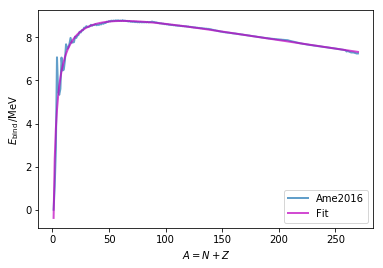

In [3]:
Masses['Eapprox']  = ytilde
# Generate a plot comparing the experimental with the fitted values values.
fig, ax = plt.subplots()
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.plot(Masses['A'], Masses['Ebinding'], alpha=0.7, lw=2,
            label='Ame2016')
ax.plot(Masses['A'], Masses['Eapprox'], alpha=0.7, lw=2, c='m',
            label='Fit')
ax.legend()
save_fig("Masses2016")
plt.show()

## Adding error analysis and training set up

We can easily test our fit by computing the $R2$ score that we discussed in connection with the functionality of _Scikit_Learn_ in the introductory slides.
Since we are not using _Scikit-Learn here we can define our $R2$ function as

In [4]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_model)) ** 2)

and we would be using it as

In [5]:
print(R2(Energies,ytilde))

0.9547578478889096


We can easily add our **MSE** score and relative error as

In [7]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(Energies,ytilde))

0.037875961483052376


and finally the relative error as

In [9]:
def RelativeError(y_data,y_model):
    return abs((y_data-y_model)/y_data)
print(RelativeError(Energies, ytilde))

A        
1    0            inf
2    1       1.123190
3    2       0.327631
4    6       0.344172
5    9       0.044402
6    14      0.076899
7    19      0.091110
8    24      0.090653
9    29      0.033010
10   34      0.060536
11   40      0.021348
12   46      0.057821
13   52      0.012456
14   57      0.002538
15   64      0.011360
16   72      0.033230
17   78      0.006406
18   85      0.014667
19   93      0.022515
20   102     0.001432
21   110     0.013773
22   118     0.007012
23   128     0.009449
24   137     0.003110
25   146     0.006650
26   154     0.001906
27   164     0.002782
28   174     0.006990
29   183     0.003376
30   192     0.008386
               ...   
238  3089    0.000277
239  3099    0.000507
240  3109    0.000072
241  3118    0.000309
242  3127    0.000048
243  3136    0.000287
244  3144    0.000074
245  3154    0.000242
246  3162    0.000222
247  3170    0.000012
248  3177    0.000331
249  3186    0.000059
250  3194    0.000165
251  3201    0.000063


## The $\chi^2$ function

Normally, the response (dependent or outcome) variable $y_i$ the outcome of a numerical experiment or another type of experiment and is thus only an approximation to the true value. It is then always accompanied by an error estimate, often limited to a statistical error estimate given by the standard deviation discussed earlier. In the discussion here we will treat $y_i$ as our exact value for the response variable.

Introducing the standard deviation $\sigma_i$ for each measurement $y_i$, we define now the $\chi^2$ function (omitting the $1/n$ term) as

$$
\chi^2(\boldsymbol{\beta})=\sum_{i=0}^{n-1}\frac{\left(y_i-\tilde{y}_i\right)^2}{\sigma_i^2}=\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\frac{1}{\boldsymbol{\Sigma^2}}\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right),
$$

where the matrix $\boldsymbol{\Sigma}$ is a diagonal matrix with $\sigma_i$ as matrix elements.



## The $\chi^2$ function

In order to find the parameters $\beta_i$ we will then minimize the spread of $\chi^2(\boldsymbol{\beta})$ by requiring

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = -2\left[ \sum_{i=0}^{n-1}\frac{x_{ij}}{\sigma_i}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right).
$$

where we have defined the matrix $\boldsymbol{A} =\boldsymbol{X}/\boldsymbol{\Sigma}$ with matrix elements $a_{ij} = x_{ij}/\sigma_i$ and the vector $\boldsymbol{b}$ with elements $b_i = y_i/\sigma_i$.



## The $\chi^2$ function

We can rewrite

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{A}^T\boldsymbol{b} = \boldsymbol{A}^T\boldsymbol{A}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{A}^T\boldsymbol{A}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1}\boldsymbol{A}^T\boldsymbol{b}.
$$

## The $\chi^2$ function

If we then introduce the matrix

$$
\boldsymbol{H} =  \left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1},
$$

we have then the following expression for the parameters $\beta_j$ (the matrix elements of $\boldsymbol{H}$ are $h_{ij}$)

$$
\beta_j = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}\frac{y_i}{\sigma_i}\frac{x_{ik}}{\sigma_i} = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}b_ia_{ik}
$$

We state without proof the expression for the uncertainty  in the parameters $\beta_j$ as (we leave this as an exercise)

$$
\sigma^2(\beta_j) = \sum_{i=0}^{n-1}\sigma_i^2\left( \frac{\partial \beta_j}{\partial y_i}\right)^2,
$$

resulting in

$$
\sigma^2(\beta_j) = \left(\sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}a_{ik}\right)\left(\sum_{l=0}^{p-1}h_{jl}\sum_{m=0}^{n-1}a_{ml}\right) = h_{jj}!
$$

## The $\chi^2$ function
The first step here is to approximate the function $y$ with a first-order polynomial, that is we write

$$
y=y(x) \rightarrow y(x_i) \approx \beta_0+\beta_1 x_i.
$$

By computing the derivatives of $\chi^2$ with respect to $\beta_0$ and $\beta_1$ show that these are given by

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_0} = -2\left[ \sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0,
$$

and

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_0} = -2\left[ \sum_{i=0}^{n-1}x_i\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0.
$$

## The $\chi^2$ function

For a linear fit we don't need to invert a matrix!!  
Defining

$$
\gamma =  \sum_{i=0}^{n-1}\frac{1}{\sigma_i^2},
$$

4
3
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

4
4
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

4
5
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\gamma_{xy} = \sum_{i=0}^{n-1}\frac{y_ix_{i}}{\sigma_i^2},
$$

we obtain

4
7
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\beta_1 = \frac{\gamma_{xy}\gamma-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2}.
$$

This approach (different linear and non-linear regression) suffers often from both being underdetermined and overdetermined in the unknown coefficients $\beta_i$.  A better approach is to use the Singular Value Decomposition (SVD) method discussed below. Or using Lasso and Ridge regression. See below.







<!-- !split  -->
## Linking the regression analysis with a statistical interpretation

Before we proceed, and to link with our discussions of Bayesian statistics to come, it is useful the derive the standard regression analysis equations using a statistical interpretation. This allows us also to derive quantities like the variance and other expectation values in a rather straightforward way. 

It is assumed that $\varepsilon_i
\sim \mathcal{N}(0, \sigma^2)$ and the $\varepsilon_{i}$ are
independent, i.e.:

$$
\begin{align*} 
\mbox{Cov}(\varepsilon_{i_1},
\varepsilon_{i_2}) & = \left\{ \begin{array}{lcc} \sigma^2 & \mbox{if}
& i_1 = i_2, \\ 0 & \mbox{if} & i_1 \not= i_2.  \end{array} \right.
\end{align*}
$$

The randomness of $\varepsilon_i$ implies that
$\mathbf{Y}_i$ is also a random variable. In particular,
$\mathbf{Y}_i$ is normally distributed, because $\varepsilon_i \sim
\mathcal{N}(0, \sigma^2)$ and $\mathbf{X}_{i,\ast} \, \beta$ is a
non-random scalar. To specify the parameters of the distribution of
$\mathbf{Y}_i$ we need to calculate its first two moments. 

## Expectation value and variance

Its expectation equals:

$$
\begin{align*} 
\mathbb{E}(Y_i) & =
\mathbb{E}(\mathbf{X}_{i, \ast} \, \beta) + \mathbb{E}(\varepsilon_i)
\, \, \, = \, \, \, \mathbf{X}_{i, \ast} \, \beta, 
\end{align*}
$$

while
its variance is

$$
\begin{align*} \mbox{Var}(Y_i) & = \mathbb{E} \{ [Y_i
- \mathbb{E}(Y_i)]^2 \} \, \, \, = \, \, \, \mathbb{E} ( Y_i^2 ) -
[\mathbb{E}(Y_i)]^2  \\  & = \mathbb{E} [ ( \mathbf{X}_{i, \ast} \,
\beta + \varepsilon_i )^2] - ( \mathbf{X}_{i, \ast} \, \beta)^2 \\ &
= \mathbb{E} [ ( \mathbf{X}_{i, \ast} \, \beta)^2 + 2 \varepsilon_i
\mathbf{X}_{i, \ast} \, \beta + \varepsilon_i^2 ] - ( \mathbf{X}_{i,
\ast} \, \beta)^2 \\  & = ( \mathbf{X}_{i, \ast} \, \beta)^2 + 2
\mathbb{E}(\varepsilon_i) \mathbf{X}_{i, \ast} \, \beta +
\mathbb{E}(\varepsilon_i^2 ) - ( \mathbf{X}_{i, \ast} \, \beta)^2 
\\ & = \mathbb{E}(\varepsilon_i^2 ) \, \, \, = \, \, \,
\mbox{Var}(\varepsilon_i) \, \, \, = \, \, \, \sigma^2.  
\end{align*}
$$

Hence, $Y_i \sim \mathcal{N}( \mathbf{X}_{i, \ast} \, \beta, \sigma^2)$. 






## The singular value decompostion


A general
$m\times n$ matrix $\boldsymbol{A}$ can be written in terms of a diagonal
matrix $\boldsymbol{D}$ of dimensionality $n\times n$ and two orthognal
matrices $\boldsymbol{U}$ and $\boldsymbol{V}$, where the first has dimensionality
$m \times m$ and the last dimensionality $n\times n$. 
We have then

$$
\boldsymbol{A} = \boldsymbol{U}\boldsymbol{D}\boldsymbol{V}^T
$$

## From standard regression to Ridge regression

One of the typical problems we encounter with linear regression, in particular 
when the matrix $\boldsymbol{X}$ (our so-called design matrix) is high-dimensional, 
are problems with near singular or singular matrices. The column vectors of $\boldsymbol{X}$ 
may be linearly dependent, normally referred to as super-collinearity.  
This means that the matrix may be rank deficient and it is basically impossible to 
to model the data using linear regression. As an example, consider the matrix

$$
\begin{align*}
\mathbf{X} & =  \left[
\begin{array}{rrr}
1 & -1 & 2
\\
1 & 0 & 1
\\
1 & 2  & -1
\\
1 & 1  & 0
\end{array} \right]
\end{align*}
$$

The columns of $\boldsymbol{X}$ are linearly dependent. We se this easily since the 
the first column is the row-wise sum of the other two columns. The rank (more correct,
the column rank) of a matrix is the dimension of the space spanned by the
column vectors. Hence, the rank of $\mathbf{X}$ is equal to the number
of linearly independent columns. In this particular case the matrix has rank 2.

Super-collinearity of an $(n \times p)$-dimensional design matrix $\mathbf{X}$ implies
that the inverse of the matrix $\boldsymbol{X}^T\boldsymbol{x}$ (the matrix we needto invert to solve the linear regression equations) is non-invertible. If we have a square matrix that does not have an inverse, we say this matrix singular. The example here demonstrates this

$$
\begin{align*}
\boldsymbol{X} & =  \left[
\begin{array}{rr}
1 & -1
\\
1 & -1
\end{array} \right].
\end{align*}
$$

We see easily that  $\mbox{det}(\boldsymbol{X}) = x_{11} x_{22} - x_{12} x_{21} = 1 \times (-1) - 1 \times (-1) = 0$. Hence, $\mathbf{X}$ is singular and its inverse is undefined.
This is equivalent to saying that the matrix $\boldsymbol{X}$ has at least an eigenvalue which is zero.

## Fixing the singularity

If our design matrix $\boldsymbol{X}$ which enters the linear regression problem

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{\beta}  =  (\boldsymbol{X}^{T} \boldsymbol{X})^{-1} \boldsymbol{X}^{T} \boldsymbol{y},
\label{_auto1} \tag{1}
\end{equation}
$$

has linearly dependent column vectors, we will not be able to compute the inverse
of $\boldsymbol{X}^T\boldsymbol{X}$ and we cannot find the parameters (estimators) $\beta_i$. 
The estimators are only well-defined if $(\boldsymbol{X}^{T}\boldsymbol{X})^{-1}$ exits. 
This is more likely to happen when the matrix $\boldsymbol{X}$ is high-dimensional. In this case it is likely to encounter a situation where 
the regression parameters $\beta_i$ cannot be estimated.

The *ad hoc* approach which was introduced in the 70s was simply to add a diagonal component to the matrix to invert, that is we change

$$
\boldsymbol{X}^{T} \boldsymbol{X} \rightarrow \boldsymbol{X}^{T} \boldsymbol{X}+\lambda \boldsymbol{I},
$$

where $\boldsymbol{I}$ is the identity matrix.






## Resampling methods
Resampling methods are an indispensable tool in modern
statistics. They involve repeatedly drawing samples from a training
set and refitting a model of interest on each sample in order to
obtain additional information about the fitted model. For example, in
order to estimate the variability of a linear regression fit, we can
repeatedly draw different samples from the training data, fit a linear
regression to each new sample, and then examine the extent to which
the resulting fits differ. Such an approach may allow us to obtain
information that would not be available from fitting the model only
once using the original training sample.



## Resampling approaches can be computationally expensive
Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using
different subsets of the training data. However, due to recent
advances in computing power, the computational requirements of
resampling methods generally are not prohibitive. In this chapter, we
discuss two of the most commonly used resampling methods,
cross-validation and the bootstrap. Both methods are important tools
in the practical application of many statistical learning
procedures. For example, cross-validation can be used to estimate the
test error associated with a given statistical learning method in
order to evaluate its performance, or to select the appropriate level
of flexibility. The process of evaluating a model’s performance is
known as model assessment, whereas the process of selecting the proper
level of flexibility for a model is known as model selection. The
bootstrap is widely used.



## Why resampling methods ?
**Statistical analysis.**

    * Our simulations can be treated as *computer experiments*. This is particularly the case for Monte Carlo methods

    * The results can be analysed with the same statistical tools as we would use analysing experimental data.

    * As in all experiments, we are looking for expectation values and an estimate of how accurate they are, i.e., possible sources for errors.

    

## Statistical analysis
    * As in other experiments, many numerical  experiments have two classes of errors:

      * Statistical errors

      * Systematical errors


    * Statistical errors can be estimated using standard tools from statistics

    * Systematical errors are method specific and must be treated differently from case to case.

    

## Statistics
The *probability distribution function (PDF)* is a function
$p(x)$ on the domain which, in the discrete case, gives us the
probability or relative frequency with which these values of $X$ occur:

$$
p(x) = \mathrm{prob}(X=x)
$$

In the continuous case, the PDF does not directly depict the
actual probability. Instead we define the probability for the
stochastic variable to assume any value on an infinitesimal interval
around $x$ to be $p(x)dx$. The continuous function $p(x)$ then gives us
the *density* of the probability rather than the probability
itself. The probability for a stochastic variable to assume any value
on a non-infinitesimal interval $[a,\,b]$ is then just the integral:

$$
\mathrm{prob}(a\leq X\leq b) = \int_a^b p(x)dx
$$

Qualitatively speaking, a stochastic variable represents the values of
numbers chosen as if by chance from some specified PDF so that the
selection of a large set of these numbers reproduces this PDF.




## Statistics, moments
A particularly useful class of special expectation values are the
*moments*. The $n$-th moment of the PDF $p$ is defined as
follows:

$$
\langle x^n\rangle \equiv \int\! x^n p(x)\,dx
$$

The zero-th moment $\langle 1\rangle$ is just the normalization condition of
$p$. The first moment, $\langle x\rangle$, is called the *mean* of $p$
and often denoted by the letter $\mu$:

$$
\langle x\rangle = \mu \equiv \int\! x p(x)\,dx
$$

## Statistics, central moments
A special version of the moments is the set of *central moments*,
the n-th central moment defined as:

$$
\langle (x-\langle x \rangle )^n\rangle \equiv \int\! (x-\langle x\rangle)^n p(x)\,dx
$$

The zero-th and first central moments are both trivial, equal $1$ and
$0$, respectively. But the second central moment, known as the
*variance* of $p$, is of particular interest. For the stochastic
variable $X$, the variance is denoted as $\sigma^2_X$ or $\mathrm{var}(X)$:

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\sigma^2_X\ \ =\ \ \mathrm{var}(X)  =  \langle (x-\langle x\rangle)^2\rangle =
\int\! (x-\langle x\rangle)^2 p(x)\,dx
\label{_auto2} \tag{2}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation} 
 =  \int\! \left(x^2 - 2 x \langle x\rangle^{2} +
  \langle x\rangle^2\right)p(x)\,dx
\label{_auto3} \tag{3}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation} 
 =  \langle x^2\rangle - 2 \langle x\rangle\langle x\rangle + \langle x\rangle^2
\label{_auto4} \tag{4}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation} 
 =  \langle x^2\rangle - \langle x\rangle^2
\label{_auto5} \tag{5}
\end{equation}
$$

The square root of the variance, $\sigma =\sqrt{\langle (x-\langle x\rangle)^2\rangle}$ is called the *standard deviation* of $p$. It is clearly just the RMS (root-mean-square)
value of the deviation of the PDF from its mean value, interpreted
qualitatively as the *spread* of $p$ around its mean.



## Statistics, covariance
Another important quantity is the so called covariance, a variant of
the above defined variance. Consider again the set $\{X_i\}$ of $n$
stochastic variables (not necessarily uncorrelated) with the
multivariate PDF $P(x_1,\dots,x_n)$. The *covariance* of two
of the stochastic variables, $X_i$ and $X_j$, is defined as follows:

$$
\mathrm{cov}(X_i,\,X_j) \equiv \langle (x_i-\langle x_i\rangle)(x_j-\langle x_j\rangle)\rangle
\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:def_covariance"></div>

$$
\begin{equation} 
=
\int\!\cdots\!\int\!(x_i-\langle x_i \rangle)(x_j-\langle x_j \rangle)\,
P(x_1,\dots,x_n)\,dx_1\dots dx_n
\label{eq:def_covariance} \tag{6}
\end{equation}
$$

with

$$
\langle x_i\rangle =
\int\!\cdots\!\int\!x_i\,P(x_1,\dots,x_n)\,dx_1\dots dx_n
$$

## Statistics, more covariance
If we consider the above covariance as a matrix $C_{ij}=\mathrm{cov}(X_i,\,X_j)$, then the diagonal elements are just the familiar
variances, $C_{ii} = \mathrm{cov}(X_i,\,X_i) = \mathrm{var}(X_i)$. It turns out that
all the off-diagonal elements are zero if the stochastic variables are
uncorrelated. This is easy to show, keeping in mind the linearity of
the expectation value. Consider the stochastic variables $X_i$ and
$X_j$, ($i\neq j$):

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
\mathrm{cov}(X_i,\,X_j) = \langle(x_i-\langle x_i\rangle)(x_j-\langle x_j\rangle)\rangle
\label{_auto6} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation} 
=\langle x_i x_j - x_i\langle x_j\rangle - \langle x_i\rangle x_j + \langle x_i\rangle\langle x_j\rangle\rangle 
\label{_auto7} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation} 
=\langle x_i x_j\rangle - \langle x_i\langle x_j\rangle\rangle - \langle \langle x_i\rangle x_j\rangle +
\langle \langle x_i\rangle\langle x_j\rangle\rangle
\label{_auto8} \tag{9}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation} 
=\langle x_i x_j\rangle - \langle x_i\rangle\langle x_j\rangle - \langle x_i\rangle\langle x_j\rangle +
\langle x_i\rangle\langle x_j\rangle
\label{_auto9} \tag{10}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation} 
=\langle x_i x_j\rangle - \langle x_i\rangle\langle x_j\rangle
\label{_auto10} \tag{11}
\end{equation}
$$

## Statistics, independent variables
If $X_i$ and $X_j$ are independent, we get 
$\langle x_i x_j\rangle =\langle x_i\rangle\langle x_j\rangle$, resulting in $\mathrm{cov}(X_i, X_j) = 0\ \ (i\neq j)$.

Also useful for us is the covariance of linear combinations of
stochastic variables. Let $\{X_i\}$ and $\{Y_i\}$ be two sets of
stochastic variables. Let also $\{a_i\}$ and $\{b_i\}$ be two sets of
scalars. Consider the linear combination:

$$
U = \sum_i a_i X_i \qquad V = \sum_j b_j Y_j
$$

By the linearity of the expectation value

$$
\mathrm{cov}(U, V) = \sum_{i,j}a_i b_j \mathrm{cov}(X_i, Y_j)
$$

## Statistics, more variance
Now, since the variance is just $\mathrm{var}(X_i) = \mathrm{cov}(X_i, X_i)$, we get
the variance of the linear combination $U = \sum_i a_i X_i$:

<!-- Equation labels as ordinary links -->
<div id="eq:variance_linear_combination"></div>

$$
\begin{equation}
\mathrm{var}(U) = \sum_{i,j}a_i a_j \mathrm{cov}(X_i, X_j)
\label{eq:variance_linear_combination} \tag{12}
\end{equation}
$$

And in the special case when the stochastic variables are
uncorrelated, the off-diagonal elements of the covariance are as we
know zero, resulting in:

7
7
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\mathrm{var}(\sum_i a_i X_i) = \sum_i a_i^2 \mathrm{var}(X_i)
$$

which will become very useful in our study of the error in the mean
value of a set of measurements.



## Statistics and stochastic processes
A *stochastic process* is a process that produces sequentially a
chain of values:

$$
\{x_1, x_2,\dots\,x_k,\dots\}.
$$

We will call these
values our *measurements* and the entire set as our measured
*sample*.  The action of measuring all the elements of a sample
we will call a stochastic *experiment* since, operationally,
they are often associated with results of empirical observation of
some physical or mathematical phenomena; precisely an experiment. We
assume that these values are distributed according to some 
PDF $p_X^{\phantom X}(x)$, where $X$ is just the formal symbol for the
stochastic variable whose PDF is $p_X^{\phantom X}(x)$. Instead of
trying to determine the full distribution $p$ we are often only
interested in finding the few lowest moments, like the mean
$\mu_X^{\phantom X}$ and the variance $\sigma_X^{\phantom X}$.




<!-- !split  -->
## Statistics and sample variables
In practical situations a sample is always of finite size. Let that
size be $n$. The expectation value of a sample, the *sample mean*, is then defined as follows:

$$
\bar{x}_n \equiv \frac{1}{n}\sum_{k=1}^n x_k
$$

The *sample variance* is:

$$
\mathrm{var}(x) \equiv \frac{1}{n}\sum_{k=1}^n (x_k - \bar{x}_n)^2
$$

its square root being the *standard deviation of the sample*. The
*sample covariance* is:

$$
\mathrm{cov}(x)\equiv\frac{1}{n}\sum_{kl}(x_k - \bar{x}_n)(x_l - \bar{x}_n)
$$

## Statistics, sample variance and covariance
Note that the sample variance is the sample covariance without the
cross terms. In a similar manner as the covariance in Eq. ([6](#eq:def_covariance)) is a measure of the correlation between
two stochastic variables, the above defined sample covariance is a
measure of the sequential correlation between succeeding measurements
of a sample.

These quantities, being known experimental values, differ
significantly from and must not be confused with the similarly named
quantities for stochastic variables, mean $\mu_X$, variance $\mathrm{var}(X)$
and covariance $\mathrm{cov}(X,Y)$.



## Statistics, law of large numbers
The law of large numbers
states that as the size of our sample grows to infinity, the sample
mean approaches the true mean $\mu_X^{\phantom X}$ of the chosen PDF:

$$
\lim_{n\to\infty}\bar{x}_n = \mu_X^{\phantom X}
$$

The sample mean $\bar{x}_n$ works therefore as an estimate of the true
mean $\mu_X^{\phantom X}$.

What we need to find out is how good an approximation $\bar{x}_n$ is to
$\mu_X^{\phantom X}$. In any stochastic measurement, an estimated
mean is of no use to us without a measure of its error. A quantity
that tells us how well we can reproduce it in another experiment. We
are therefore interested in the PDF of the sample mean itself. Its
standard deviation will be a measure of the spread of sample means,
and we will simply call it the *error* of the sample mean, or
just sample error, and denote it by $\mathrm{err}_X^{\phantom X}$. In
practice, we will only be able to produce an *estimate* of the
sample error since the exact value would require the knowledge of the
true PDFs behind, which we usually do not have.




## Statistics, more on sample error
Let us first take a look at what happens to the sample error as the
size of the sample grows. In a sample, each of the measurements $x_i$
can be associated with its own stochastic variable $X_i$. The
stochastic variable $\overline X_n$ for the sample mean $\bar{x}_n$ is
then just a linear combination, already familiar to us:

$$
\overline X_n = \frac{1}{n}\sum_{i=1}^n X_i
$$

All the coefficients are just equal $1/n$. The PDF of $\overline X_n$,
denoted by $p_{\overline X_n}(x)$ is the desired PDF of the sample
means.



## Statistics
The probability density of obtaining a sample mean $\bar x_n$
is the product of probabilities of obtaining arbitrary values $x_1,
x_2,\dots,x_n$ with the constraint that the mean of the set $\{x_i\}$
is $\bar x_n$:

$$
p_{\overline X_n}(x) = \int p_X^{\phantom X}(x_1)\cdots
\int p_X^{\phantom X}(x_n)\ 
\delta\!\left(x - \frac{x_1+x_2+\dots+x_n}{n}\right)dx_n \cdots dx_1
$$

And in particular we are interested in its variance $\mathrm{var}(\overline X_n)$.





## Statistics, central limit theorem
It is generally not possible to express $p_{\overline X_n}(x)$ in a
closed form given an arbitrary PDF $p_X^{\phantom X}$ and a number
$n$. But for the limit $n\to\infty$ it is possible to make an
approximation. The very important result is called *the central limit theorem*. It tells us that as $n$ goes to infinity,
$p_{\overline X_n}(x)$ approaches a Gaussian distribution whose mean
and variance equal the true mean and variance, $\mu_{X}^{\phantom X}$
and $\sigma_{X}^{2}$, respectively:

<!-- Equation labels as ordinary links -->
<div id="eq:central_limit_gaussian"></div>

$$
\begin{equation}
\lim_{n\to\infty} p_{\overline X_n}(x) =
\left(\frac{n}{2\pi\mathrm{var}(X)}\right)^{1/2}
e^{-\frac{n(x-\bar x_n)^2}{2\mathrm{var}(X)}}
\label{eq:central_limit_gaussian} \tag{13}
\end{equation}
$$

## Statistics, more technicalities
The desired variance
$\mathrm{var}(\overline X_n)$, i.e. the sample error squared
$\mathrm{err}_X^2$, is given by:

<!-- Equation labels as ordinary links -->
<div id="eq:error_exact"></div>

$$
\begin{equation}
\mathrm{err}_X^2 = \mathrm{var}(\overline X_n) = \frac{1}{n^2}
\sum_{ij} \mathrm{cov}(X_i, X_j)
\label{eq:error_exact} \tag{14}
\end{equation}
$$

We see now that in order to calculate the exact error of the sample
with the above expression, we would need the true means
$\mu_{X_i}^{\phantom X}$ of the stochastic variables $X_i$. To
calculate these requires that we know the true multivariate PDF of all
the $X_i$. But this PDF is unknown to us, we have only got the measurements of
one sample. The best we can do is to let the sample itself be an
estimate of the PDF of each of the $X_i$, estimating all properties of
$X_i$ through the measurements of the sample.




## Statistics
Our estimate of $\mu_{X_i}^{\phantom X}$ is then the sample mean $\bar x$
itself, in accordance with the the central limit theorem:

$$
\mu_{X_i}^{\phantom X} = \langle x_i\rangle \approx \frac{1}{n}\sum_{k=1}^n x_k = \bar x
$$

Using $\bar x$ in place of $\mu_{X_i}^{\phantom X}$ we can give an
*estimate* of the covariance in Eq. ([14](#eq:error_exact))

$$
\mathrm{cov}(X_i, X_j) = \langle (x_i-\langle x_i\rangle)(x_j-\langle x_j\rangle)\rangle
\approx\langle (x_i - \bar x)(x_j - \bar{x})\rangle,
$$

resulting in

$$
\frac{1}{n} \sum_{l}^n \left(\frac{1}{n}\sum_{k}^n (x_k -\bar x_n)(x_l - \bar x_n)\right)=\frac{1}{n}\frac{1}{n} \sum_{kl} (x_k -\bar x_n)(x_l - \bar x_n)=\frac{1}{n}\mathrm{cov}(x)
$$

## Statistics and sample variance
By the same procedure we can use the sample variance as an
estimate of the variance of any of the stochastic variables $X_i$

$$
\mathrm{var}(X_i)=\langle x_i - \langle x_i\rangle\rangle \approx \langle x_i - \bar x_n\rangle\nonumber,
$$

which is approximated as

<!-- Equation labels as ordinary links -->
<div id="eq:var_estimate_i_think"></div>

$$
\begin{equation}
\mathrm{var}(X_i)\approx \frac{1}{n}\sum_{k=1}^n (x_k - \bar x_n)=\mathrm{var}(x)
\label{eq:var_estimate_i_think} \tag{15}
\end{equation}
$$

Now we can calculate an estimate of the error
$\mathrm{err}_X^{\phantom X}$ of the sample mean $\bar x_n$:

$$
\mathrm{err}_X^2
=\frac{1}{n^2}\sum_{ij} \mathrm{cov}(X_i, X_j) \nonumber
$$

$$
\approx\frac{1}{n^2}\sum_{ij}\frac{1}{n}\mathrm{cov}(x) =\frac{1}{n^2}n^2\frac{1}{n}\mathrm{cov}(x)\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate"></div>

$$
\begin{equation} 
=\frac{1}{n}\mathrm{cov}(x)
\label{eq:error_estimate} \tag{16}
\end{equation}
$$

which is nothing but the sample covariance divided by the number of
measurements in the sample.



## Statistics, uncorrelated results

In the special case that the measurements of the sample are
uncorrelated (equivalently the stochastic variables $X_i$ are
uncorrelated) we have that the off-diagonal elements of the covariance
are zero. This gives the following estimate of the sample error:

$$
\mathrm{err}_X^2=\frac{1}{n^2}\sum_{ij} \mathrm{cov}(X_i, X_j) =
\frac{1}{n^2} \sum_i \mathrm{var}(X_i),
$$

resulting in

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate_uncorrel"></div>

$$
\begin{equation}
\mathrm{err}_X^2\approx \frac{1}{n^2} \sum_i \mathrm{var}(x)= \frac{1}{n}\mathrm{var}(x)
\label{eq:error_estimate_uncorrel} \tag{17}
\end{equation}
$$

where in the second step we have used Eq. ([15](#eq:var_estimate_i_think)).
The error of the sample is then just its standard deviation divided by
the square root of the number of measurements the sample contains.
This is a very useful formula which is easy to compute. It acts as a
first approximation to the error, but in numerical experiments, we
cannot overlook the always present correlations.



## Statistics, computations
For computational purposes one usually splits up the estimate of
$\mathrm{err}_X^2$, given by Eq. ([16](#eq:error_estimate)), into two
parts

$$
\mathrm{err}_X^2 = \frac{1}{n}\mathrm{var}(x) + \frac{1}{n}(\mathrm{cov}(x)-\mathrm{var}(x)),
$$

which equals

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate_split_up"></div>

$$
\begin{equation}
\frac{1}{n^2}\sum_{k=1}^n (x_k - \bar x_n)^2 +\frac{2}{n^2}\sum_{k<l} (x_k - \bar x_n)(x_l - \bar x_n)
\label{eq:error_estimate_split_up} \tag{18}
\end{equation}
$$

The first term is the same as the error in the uncorrelated case,
Eq. ([17](#eq:error_estimate_uncorrel)). This means that the second
term accounts for the error correction due to correlation between the
measurements. For uncorrelated measurements this second term is zero.



## Statistics, more on computations of errors
Computationally the uncorrelated first term is much easier to treat
efficiently than the second.

$$
\mathrm{var}(x) = \frac{1}{n}\sum_{k=1}^n (x_k - \bar x_n)^2 =
\left(\frac{1}{n}\sum_{k=1}^n x_k^2\right) - \bar x_n^2
$$

We just accumulate separately the values $x^2$ and $x$ for every
measurement $x$ we receive. The correlation term, though, has to be
calculated at the end of the experiment since we need all the
measurements to calculate the cross terms. Therefore, all measurements
have to be stored throughout the experiment.






## Statistics, wrapping up 1
Let us analyze the problem by splitting up the correlation term into
partial sums of the form:

$$
f_d = \frac{1}{n-d}\sum_{k=1}^{n-d}(x_k - \bar x_n)(x_{k+d} - \bar x_n)
$$

The correlation term of the error can now be rewritten in terms of
$f_d$

$$
\frac{2}{n}\sum_{k<l} (x_k - \bar x_n)(x_l - \bar x_n) =
2\sum_{d=1}^{n-1} f_d
$$

The value of $f_d$ reflects the correlation between measurements
separated by the distance $d$ in the sample samples.  Notice that for
$d=0$, $f$ is just the sample variance, $\mathrm{var}(x)$. If we divide $f_d$
by $\mathrm{var}(x)$, we arrive at the so called *autocorrelation function*

$$
\kappa_d = \frac{f_d}{\mathrm{var}(x)}
$$

which gives us a useful measure of pairwise correlations
starting always at $1$ for $d=0$.




## Statistics, final expression
The sample error (see eq. ([18](#eq:error_estimate_split_up))) can now be
written in terms of the autocorrelation function:

$$
\mathrm{err}_X^2 =
\frac{1}{n}\mathrm{var}(x)+\frac{2}{n}\cdot\mathrm{var}(x)\sum_{d=1}^{n-1}
\frac{f_d}{\mathrm{var}(x)}\nonumber
$$

$$
=
\left(1+2\sum_{d=1}^{n-1}\kappa_d\right)\frac{1}{n}\mathrm{var}(x)\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="eq:error_estimate_corr_time"></div>

$$
\begin{equation} 
=\frac{\tau}{n}\cdot\mathrm{var}(x)
\label{eq:error_estimate_corr_time} \tag{19}
\end{equation}
$$

and we see that $\mathrm{err}_X$ can be expressed in terms the
uncorrelated sample variance times a correction factor $\tau$ which
accounts for the correlation between measurements. We call this
correction factor the *autocorrelation time*:

<!-- Equation labels as ordinary links -->
<div id="eq:autocorrelation_time"></div>

$$
\begin{equation}
\tau = 1+2\sum_{d=1}^{n-1}\kappa_d
\label{eq:autocorrelation_time} \tag{20}
\end{equation}
$$

## Statistics, effective number of correlations
For a correlation free experiment, $\tau$
equals 1. From the point of view of
eq. ([19](#eq:error_estimate_corr_time)) we can interpret a sequential
correlation as an effective reduction of the number of measurements by
a factor $\tau$. The effective number of measurements becomes:

$$
n_\mathrm{eff} = \frac{n}{\tau}
$$

To neglect the autocorrelation time $\tau$ will always cause our
simple uncorrelated estimate of $\mathrm{err}_X^2\approx \mathrm{var}(x)/n$ to
be less than the true sample error. The estimate of the error will be
too *good*. On the other hand, the calculation of the full
autocorrelation time poses an efficiency problem if the set of
measurements is very large.








## Log-likelihood

A popular strategy is to choose a penalty parameter that yields a good
but parsimonious model. Information criteria measure the balance
between model fit and model complexity. One possibility is  Aikaike's
information criterion (AIC).
The AIC measures model fit by the log-likelihood
and model complexity is measured by the number of parameters used by
the model. The number of model parameters in regular regression simply
corresponds to the number of covariates in the model. Or, by the
degrees of freedom consumed by the model, which is equivalent to the
trace of the hat matrix. For ridge regression it thus seems natural to
define model complexity analogously by the trace of the ridge hat
matrix. This yields the AIC for the linear regression model with ridge
estimates:

$$
\begin{align*}
\mbox{AIC}(\lambda) & =  2 \, p - 2 \log(\boldsymbol{L})
\\
& =  2 \, \mbox{tr} [\mathbf{H}(\lambda)] - 2 \log\{L[\boldsymbol{\beta}(\lambda), \boldsymbol{\sigma}^2(\lambda)]\}
\\
& =  2 \, \sum_{j=1}^p \frac{d_{jj}^2}{d_{jj}^2 + \lambda}
+ 2 n \, \log[\sqrt{2 \, \pi} \, \boldsymbol{\sigma}(\lambda)] +  \frac{1}{\boldsymbol{\sigma}^2(\lambda)} \sum_{i=1}^n [y_i - \mathbf{X}_{i, \ast} \, \boldsymbol{\beta}(\lambda)]^2.
\end{align*}
$$

The value of $\lambda$ which minimizes $\mbox{AIC}(\lambda)$ corresponds to the `optimal' balance of model complexity and overfitting.


<!-- !split  -->
## Cross-validation

Instead of choosing the penalty parameter to balance model fit with
model complexity, cross-validation requires it (i.e. the penalty
parameter) to yield a model with good prediction
performance. Commonly, this performance is evaluated on novel
data. Novel data need not be easy to come by and one has to make do
with the data at hand. The setting of `original' and novel data is
then mimicked by sample splitting: the data set is divided into two
(groups of samples). One of these two data sets, called the *training
set*, plays the role of `original' data on which the model is
built. The second of these data sets, called the *test set*, plays the
role of the `novel' data and is used to evaluate the prediction
performance (often operationalized as the log-likelihood or the
prediction error or its square or the R2 score) of the model built on the training data set. This
procedure (model building and prediction evaluation on training and
test set, respectively) is done for a collection of possible penalty
parameter choices. The penalty parameter that yields the model with
the best prediction performance is to be preferred. The thus obtained
performance evaluation depends on the actual split of the data set. To
remove this dependence the data set is split many times into a
training and test set. For each split the model parameters are
estimated for all choices of $\lambda$ using the training data and
estimated parameters are evaluated on the corresponding test set. The
penalty parameter that on average over the test sets performs best (in
some sense) is then selected.


## Computationally expensive

The validation set approach is conceptually simple and is easy to implement. But it has two potential drawbacks:

* The validation estimate of the test error rate can be highly variable, depending on precisely which observations are included in the training set and which observations are included in the validation set.

* In the validation approach, only a subset of the observations, those that are included in the training set rather than in the validation set are used to fit the model. Since statistical methods tend to perform worse when trained on fewer observations, this suggests that the validation set error rate may tend to overestimate the test error rate for the model fit on the entire data set.

<!-- !split  -->
## Various steps in cross-validation

When the repetitive splitting of the data set is done randomly,
samples may accidently end up in a fast majority of the splits in
either training or test set. Such samples may have an unbalanced
influence on either model building or prediction evaluation. To avoid
this $k$-fold cross-validation structures the data splitting. The
samples are divided into $k$ more or less equally sized exhaustive and
mutually exclusive subsets. In turn (at each split) one of these
subsets plays the role of the test set while the union of the
remaining subsets constitutes the training set. Such a splitting
warrants a balanced representation of each sample in both training and
test set over the splits. Still the division into the $k$ subsets
involves a degree of randomness. This may be fully excluded when
choosing $k=n$. This particular case is referred to as leave-one-out
cross-validation (LOOCV). 

<!-- !split  -->
## How to set up the cross-validation for Ridge and/or Lasso

* Define a range of interest for the penalty parameter.

* Divide the data set into training and test set comprising samples $\{1, \ldots, n\} \setminus i$ and $\{ i \}$, respectively.

* Fit the linear regression model by means of ridge estimation  for each $\lambda$ in the grid using the training set, and the corresponding estimate of the error variance $\boldsymbol{\sigma}_{-i}^2(\lambda)$, as

$$
\begin{align*}
\boldsymbol{\beta}_{-i}(\lambda) & =  ( \boldsymbol{X}_{-i, \ast}^{\top}
\boldsymbol{X}_{-i, \ast} + \lambda \boldsymbol{I}_{pp})^{-1}
\boldsymbol{X}_{-i, \ast}^{\top} \boldsymbol{y}_{-i}
\end{align*}
$$

* Evaluate the prediction performance of these models on the test set by $\log\{L[y_i, \boldsymbol{X}_{i, \ast}; \boldsymbol{\beta}_{-i}(\lambda), \boldsymbol{\sigma}_{-i}^2(\lambda)]\}$. Or, by the prediction error $|y_i - \boldsymbol{X}_{i, \ast} \boldsymbol{\beta}_{-i}(\lambda)|$, the relative error, the error squared or the R2 score function.

* Repeat the first three steps  such that each sample plays the role of the test set once.

* Average the prediction performances of the test sets at each grid point of the penalty bias/parameter by computing the *cross-validated log-likelihood*. It is an estimate of the prediction performance of the model corresponding to this value of the penalty parameter on novel data. It is defined as

$$
\begin{align*}
\frac{1}{n} \sum_{i = 1}^n \log\{L[y_i, \mathbf{X}_{i, \ast}; \boldsymbol{\beta}_{-i}(\lambda), \boldsymbol{\sigma}_{-i}^2(\lambda)]\}.
\end{align*}
$$

* The value of the penalty parameter that maximizes the cross-validated log-likelihood is the value of choice. Or we can use the MSE or the R2 score functions.

## Predicted Residual Error Sum of Squares
Another approach in the LOOCV scheme is to the use the so-called Predicted Residual Error Sum of Squares (PRESS). 

We can define the optimal penalty parameter to minimize

$$
\begin{align*}
\lambda_{\mbox{{\tiny opt}}} = \arg \min_{\lambda} \frac{1}{n} \sum_{i=1}^n [y_i - \boldsymbol{X}_{i, \ast} \boldsymbol{\beta}_{-i}(\lambda)]^2.
\end{align*}
$$

The LOOCV prediction performance can be
expressed analytically in terms of the known quantities derived from
the design matrix and the parameters $\beta$.




## Resampling methods: Jackknife and Bootstrap

Two famous
resampling methods are the **independent bootstrap** and **the jackknife**. 

The jackknife is a special case of the independent bootstrap. Still, the jackknife was made
popular prior to the independent bootstrap. And as the popularity of
the independent bootstrap soared, new variants, such as **the dependent bootstrap**.

The Jackknife and independent bootstrap work for
independent, identically distributed random variables.
If these conditions are not
satisfied, the methods will fail.  Yet, it should be said that if the data are
independent, identically distributed, and we only want to estimate the
variance of $\overline{X}$ (which often is the case), then there is no
need for bootstrapping. 

## Resampling methods: Jackknife

The Jackknife works by making many replicas of the estimator $\widehat{\theta}$. 
The jackknife is a resampling method, we explained that this happens by scrambling the data in some way. When using the jackknife, this is done by systematically leaving out one observation from the vector of observed values $\boldsymbol{x} = (x_1,x_2,\cdots,X_n)$. 
Let $\boldsymbol{x}_i$ denote the vector

$$
\boldsymbol{x}_i = (x_1,x_2,\cdots,x_{i-1},x_{i+1},\cdots,x_n),
$$

which equals the vector $\boldsymbol{x}$ with the exception that observation
number $i$ is left out. Using this notation, define
$\widehat{\theta}_i$ to be the estimator
$\widehat{\theta}$ computed using $\vec{X}_i$. 

## Resampling methods: Jackknife estimator

To get an estimate for the bias and
standard error of $\widehat{\theta}$, use the following
estimators for each component of $\widehat{\theta}$

$$
\widehat{\mathrm{Bias}}(\widehat \theta,\theta) = (n-1)\left( - \widehat{\theta} + \frac{1}{n}\sum_{i=1}^{n} \widehat \theta_i \right) \qquad \text{and} \qquad \widehat{\sigma}^2_{\widehat{\theta} } = \frac{n-1}{n}\sum_{i=1}^{n}( \widehat{\theta}_i - \frac{1}{n}\sum_{j=1}^{n}\widehat \theta_j )^2.
$$

## Jackknife code example

In [9]:
from numpy import *
from numpy.random import randint, randn
from time import time

def jackknife(data, stat):
    n = len(data);t = zeros(n); inds = arange(n); t0 = time()
    ## 'jackknifing' by leaving out an observation for each i                                                                                                                      
    for i in range(n):
        t[i] = stat(delete(data,i) )

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Jackknife Statistics :")
    print("original           bias      std. error")
    print("%8g %14g %15g" % (stat(data),(n-1)*mean(t)/n, (n*var(t))**.5))

    return t


# Returns mean of data samples                                                                                                                                                     
def stat(data):
    return mean(data)


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# jackknife returns the data sample                                                                                                                                                
t = jackknife(x, stat)

## Resampling methods: Bootstrap
Bootstrapping is a nonparametric approach to statistical inference
that substitutes computation for more traditional distributional
assumptions and asymptotic results. Bootstrapping offers a number of
advantages: 
1. The bootstrap is quite general, although there are some cases in which it fails.  

2. Because it does not require distributional assumptions (such as normally distributed errors), the bootstrap can provide more accurate inferences when the data are not well behaved or when the sample size is small.  

3. It is possible to apply the bootstrap to statistics with sampling distributions that are difficult to derive, even asymptotically. 

4. It is relatively simple to apply the bootstrap to complex data-collection plans (such as stratified and clustered samples).




## Resampling methods: Bootstrap background

Since $\widehat{\theta} = \widehat{\theta}(\boldsymbol{X})$ is a function of random variables,
$\widehat{\theta}$ itself must be a random variable. Thus it has
a pdf, call this function $p(\boldsymbol{t})$. The aim of the bootstrap is to
estimate $p(\boldsymbol{t})$ by the relative frequency of
$\widehat{\theta}$. You can think of this as using a histogram
in the place of $p(\boldsymbol{t})$. If the relative frequency closely
resembles $p(\vec{t})$, then using numerics, it is straight forward to
estimate all the interesting parameters of $p(\boldsymbol{t})$ using point
estimators.  


## Resampling methods: More Bootstrap background

In the case that $\widehat{\theta}$ has
more than one component, and the components are independent, we use the
same estimator on each component separately.  If the probability
density function of $X_i$, $p(x)$, had been known, then it would have
been straight forward to do this by: 
1. Drawing lots of numbers from $p(x)$, suppose we call one such set of numbers $(X_1^*, X_2^*, \cdots, X_n^*)$. 

2. Then using these numbers, we could compute a replica of $\widehat{\theta}$ called $\widehat{\theta}^*$. 

By repeated use of (1) and (2), many
estimates of $\widehat{\theta}$ could have been obtained. The
idea is to use the relative frequency of $\widehat{\theta}^*$
(think of a histogram) as an estimate of $p(\boldsymbol{t})$.

## Resampling methods: Bootstrap approach

But
unless there is enough information available about the process that
generated $X_1,X_2,\cdots,X_n$, $p(x)$ is in general
unknown. Therefore, [Efron in 1979](https://projecteuclid.org/euclid.aos/1176344552)  asked the
question: What if we replace $p(x)$ by the relative frequency
of the observation $X_i$; if we draw observations in accordance with
the relative frequency of the observations, will we obtain the same
result in some asymptotic sense? The answer is yes.


Instead of generating the histogram for the relative
frequency of the observation $X_i$, just draw the values
$(X_1^*,X_2^*,\cdots,X_n^*)$ with replacement from the vector
$\boldsymbol{X}$. 

## Resampling methods: Bootstrap steps

The independent bootstrap works like this: 

1. Draw with replacement $n$ numbers for the observed variables $\boldsymbol{x} = (x_1,x_2,\cdots,x_n)$. 

2. Define a vector $\boldsymbol{x}^*$ containing the values which were drawn from $\boldsymbol{x}$. 

3. Using the vector $\boldsymbol{x}^*$ compute $\widehat{\theta}^*$ by evaluating $\widehat \theta$ under the observations $\boldsymbol{x}^*$. 

4. Repeat this process $k$ times. 

When you are done, you can draw a histogram of the relative frequency of $\widehat \theta^*$. This is your estimate of the probability distribution $p(t)$. Using this probability distribution you can estimate any statistics thereof. In principle you never draw the histogram of the relative frequency of $\widehat{\theta}^*$. Instead you use the estimators corresponding to the statistic of interest. For example, if you are interested in estimating the variance of $\widehat \theta$, apply the etsimator $\widehat \sigma^2$ to the values $\widehat \theta ^*$.


## Code example for the Bootstrap method
The following code starts with a Gaussian distribution with mean value $\mu =100$ and variance $\sigma=15$. We use this to generate the data used in the bootstrap analysis. The bootstrap analysis returns a data set after a given number of bootstrap operations (as many as we have data points). This data set consists of estimated mean values for each bootstrap operation. The histogram generated by the bootstrap method shows that the distribution for these mean values is also a Gaussian, centered around the mean value $\mu=100$ but with standard deviation $\sigma/\sqrt{n}$, where $n$ is the number of bootstrap samples (in this case the same as the number of original data points). The value of the standard deviation is what we expect from the central limit theorem.

In [10]:
from numpy import *
from numpy.random import randint, randn
from time import time
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Returns mean of bootstrap samples                                                                                                                                                
def stat(data):
    return mean(data)

# Bootstrap algorithm                                                                                                                                                              
def bootstrap(data, statistic, R):
    t = zeros(R); n = len(data); inds = arange(n); t0 = time()

    # non-parametric bootstrap                                                                                                                                                     
    for i in range(R):
        t[i] = statistic(data[randint(0,n,n)])

    # analysis                                                                                                                                                                     
    print("Runtime: %g sec" % (time()-t0)); print("Bootstrap Statistics :")
    print("original           bias      std. error")
    print("%8g %8g %14g %15g" % (statistic(data), std(data),\
                             mean(t), \
                             std(t)))
    return t


mu, sigma = 100, 15
datapoints = 10000
x = mu + sigma*random.randn(datapoints)
# bootstrap returns the data sample                                                                                                          t = bootstrap(x, stat, datapoints)
# the histogram of the bootstrapped  data                                                                                                    n, binsboot, patches = plt.hist(t, 50, normed=1, facecolor='red', alpha=0.75)

# add a 'best fit' line                                                                                                                                                          
y = mlab.normpdf( binsboot, mean(t), std(t))
lt = plt.plot(binsboot, y, 'r--', linewidth=1)
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.axis([99.5, 100.6, 0, 3.0])
plt.grid(True)

plt.show()

## Resampling methods: Blocking

The blocking method was made popular by [Flyvbjerg and Pedersen (1989)](https://aip.scitation.org/doi/10.1063/1.457480)
and has become one of the standard ways to estimate
$V(\widehat{\theta})$ for exactly one $\widehat{\theta}$, namely
$\widehat{\theta} = \overline{X}$. 

Assume $n = 2^d$ for some integer $d>1$ and $X_1,X_2,\cdots, X_n$ is a stationary time series to begin with. 
Moreover, assume that the time series is asymptotically uncorrelated. We switch to vector notation by arranging $X_1,X_2,\cdots,X_n$ in an $n$-tuple. Define:

$$
\begin{align*}
\boldsymbol{X} = (X_1,X_2,\cdots,X_n).
\end{align*}
$$

The strength of the blocking method is when the number of
observations, $n$ is large. For large $n$, the complexity of dependent
bootstrapping scales poorly, but the blocking method does not,
moreover, it becomes more accurate the larger $n$ is.

## Blocking Transformations
 We now define
blocking transformations. The idea is to take the mean of subsequent
pair of elements from $\vec{X}$ and form a new vector
$\vec{X}_1$. Continuing in the same way by taking the mean of
subsequent pairs of elements of $\vec{X}_1$ we obtain $\vec{X}_2$, and
so on. 
Define $\vec{X}_i$ recursively by:

$$
(\vec{X}_0)_k \equiv (\vec{X})_k \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation} 
(\vec{X}_{i+1})_k \equiv \frac{1}{2}\Big( (\vec{X}_i)_{2k-1} +
(\vec{X}_i)_{2k} \Big) \qquad \text{for all} \qquad 1 \leq i \leq d-1
\label{_auto11} \tag{21}
\end{equation}
$$

The quantity $\vec{X}_k$ is
subject to $k$ **blocking transformations**.  We now have $d$ vectors
$\vec{X}_0, \vec{X}_1,\cdots,\vec X_{d-1}$ containing the subsequent
averages of observations. It turns out that if the components of
$\vec{X}$ is a stationary time series, then the components of
$\vec{X}_i$ is a stationary time series for all $0 \leq i \leq d-1$

We can then compute the autocovariance, the variance, sample mean, and
number of observations for each $i$. 
Let $\gamma_i, \sigma_i^2,
\overline{X}_i$ denote the autocovariance, variance and average of the
elements of $\vec{X}_i$ and let $n_i$ be the number of elements of
$\vec{X}_i$. It follows by induction that $n_i = n/2^i$. 

## Blocking Transformations

Using the
definition of the blocking transformation and the distributive
property of the covariance, it is clear that since $h =|i-j|$
we can define

$$
\gamma_{k+1}(h) = cov\left( ({X}_{k+1})_{i}, ({X}_{k+1})_{j} \right) \nonumber
$$

$$
=  \frac{1}{4}cov\left( ({X}_{k})_{2i-1} + ({X}_{k})_{2i}, ({X}_{k})_{2j-1} + ({X}_{k})_{2j} \right) \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation} 
=  \frac{1}{2}\gamma_{k}(2h) + \frac{1}{2}\gamma_k(2h+1) \hspace{0.1cm} \mathrm{h = 0} 
\label{_auto12} \tag{22}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation} 
=\frac{1}{4}\gamma_k(2h-1) + \frac{1}{2}\gamma_k(2h) + \frac{1}{4}\gamma_k(2h+1) \quad \mathrm{else}
\label{_auto13} \tag{23}
\end{equation}
$$

The quantity $\boldsymbol{X}$ is asymptotic uncorrelated by assumption, $\boldsymbol{X}_k$ is also asymptotic uncorrelated. Let's turn our attention to the variance of the sample mean $V(\overline{X})$. 

## Blocking Transformations, getting there
We have

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation}
V(\overline{X}_k) = \frac{\sigma_k^2}{n_k} + \underbrace{\frac{2}{n_k} \sum_{h=1}^{n_k-1}\left( 1 - \frac{h}{n_k} \right)\gamma_k(h)}_{\equiv e_k} = \frac{\sigma^2_k}{n_k} + e_k \quad \text{if} \quad \gamma_k(0) = \sigma_k^2. 
\label{_auto14} \tag{24}
\end{equation}
$$

The term $e_k$ is called the **truncation error**:

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
e_k = \frac{2}{n_k} \sum_{h=1}^{n_k-1}\left( 1 - \frac{h}{n_k} \right)\gamma_k(h). 
\label{_auto15} \tag{25}
\end{equation}
$$

We can show that $V(\overline{X}_i) = V(\overline{X}_j)$ for all $0 \leq i \leq d-1$ and $0 \leq j \leq d-1$. 

## Blocking Transformations, final expressions

We can then wrap up

$$
n_{j+1} \overline{X}_{j+1}  = \sum_{i=1}^{n_{j+1}} (\boldsymbol{X}_{j+1})_i =  \frac{1}{2}\sum_{i=1}^{n_{j}/2} (\boldsymbol{X}_{j})_{2i-1} + (\boldsymbol{X}_{j})_{2i} \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation} 
= \frac{1}{2}\left[ (\boldsymbol{X}_j)_1 + (\boldsymbol{X}_j)_2 + \cdots + (\boldsymbol{X}_j)_{n_j} \right] = \underbrace{\frac{n_j}{2}}_{=n_{j+1}} \overline{X}_j = n_{j+1}\overline{X}_j. 
\label{_auto16} \tag{26}
\end{equation}
$$

By repeated use of this equation we get $V(\overline{X}_i) = V(\overline{X}_0) = V(\overline{X})$ for all $0 \leq i \leq d-1$. This has the consequence that

<!-- Equation labels as ordinary links -->
<div id="eq:convergence"></div>

$$
\begin{equation}
V(\overline{X}) = \frac{\sigma_k^2}{n_k} + e_k \qquad \text{for all} \qquad 0 \leq k \leq d-1. \label{eq:convergence} \tag{27}
\end{equation}
$$

Fyvbjerg and Petersen demonstrated that the sequence
$\{e_k\}_{k=0}^{d-1}$ is decreasing, and conjecture that the term
$e_k$ can be made as small as we would like by making $k$ (and hence
$d$) sufficiently large. The sequence is decreasing (Master of Science thesis by Marius Jonsson, UiO 2018).
It means we can apply blocking transformations until
$e_k$ is sufficiently small, and then estimate $V(\overline{X})$ by
$\widehat{\sigma}^2_k/n_k$. 


## [Code examples for Blocking, Jackknife and bootstrap](https://github.com/CompPhysics/MachineLearning/tree/master/doc/Programs/ResamplingAnalysisScripts)

In [11]:
from sys import argv
from os import mkdir, path
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.font_manager import FontProperties

# Timing Decorator
def timeFunction(f):
    def wrap(*args):
        time1 = time.time()
        ret = f(*args)
        time2 = time.time()
        print '%s Function Took: \t %0.3f s' % (f.func_name.title(), (time2-time1))
        return ret
    return wrap

class dataAnalysisClass:
    # General Init functions
    def __init__(self, fileName, size=0):
        self.inputFileName = fileName
        self.loadData(size)
        self.createOutputFolder()
        self.avg = np.average(self.data)
        self.var = np.var(self.data)
        self.std = np.std(self.data)

    def loadData(self, size=0):
        if size != 0:
            with open(self.inputFileName) as inputFile:
                self.data = np.zeros(size)
                for x in xrange(size):
                    self.data[x] = float(next(inputFile))
        else:
            self.data = np.loadtxt(self.inputFileName)

    # Statistical Analysis with Multiple Methods
    def runAllAnalyses(self):
        if len(self.data) <= 100000:
            print "Autocorrelation..."
            self.autocorrelation()
        print "Bootstrap..."
        self.bootstrap()
        print "Jackknife..."
        self.jackknife()
        print "Blocking..."
        self.blocking()

    # Standard Autocorrelation
    @timeFunction
    def autocorrelation(self):
        self.acf = np.zeros(len(self.data)/2)
        for k in range(0, len(self.data)/2):
            self.acf[k] = np.corrcoef(np.array([self.data[0:len(self.data)-k], \
                                            self.data[k:len(self.data)]]))[0,1]

    # Bootstrap
    @timeFunction
    def bootstrap(self, nBoots = 1000):
        bootVec = np.zeros(nBoots)
        for k in range(0,nBoots):
            bootVec[k] = np.average(np.random.choice(self.data, len(self.data)))
        self.bootAvg = np.average(bootVec)
        self.bootVar = np.var(bootVec)
        self.bootStd = np.std(bootVec)

    # Jackknife
    @timeFunction
    def jackknife(self):
        jackknVec = np.zeros(len(self.data))
        for k in range(0,len(self.data)):
            jackknVec[k] = np.average(np.delete(self.data, k))
        self.jackknAvg = self.avg - (len(self.data) - 1) * (np.average(jackknVec) - self.avg)
        self.jackknVar = float(len(self.data) - 1) * np.var(jackknVec)
        self.jackknStd = np.sqrt(self.jackknVar)

    # Blocking
    @timeFunction
    def blocking(self, blockSizeMax = 500):
        blockSizeMin = 1

        self.blockSizes = []
        self.meanVec = []
        self.varVec = []

        for i in range(blockSizeMin, blockSizeMax):
            if(len(self.data) % i != 0):
                pass#continue
            blockSize = i
            meanTempVec = []
            varTempVec = []
            startPoint = 0
            endPoint = blockSize

            while endPoint <= len(self.data):
                meanTempVec.append(np.average(self.data[startPoint:endPoint]))
                startPoint = endPoint
                endPoint += blockSize
            mean, var = np.average(meanTempVec), np.var(meanTempVec)/len(meanTempVec)
            self.meanVec.append(mean)
            self.varVec.append(var)
            self.blockSizes.append(blockSize)

        self.blockingAvg = np.average(self.meanVec[-200:])
        self.blockingVar = (np.average(self.varVec[-200:]))
        self.blockingStd = np.sqrt(self.blockingVar)



    # Plot of Data, Autocorrelation Function and Histogram
    def plotAll(self):
        self.createOutputFolder()
        if len(self.data) <= 100000:
            self.plotAutocorrelation()
        self.plotData()
        self.plotHistogram()
        self.plotBlocking()

    # Create Output Plots Folder
    def createOutputFolder(self):
        self.outName = self.inputFileName[:-4]
        if not path.exists(self.outName):
            mkdir(self.outName)

    # Plot the Dataset, Mean and Std
    def plotData(self):
        # Far away plot
        font = {'fontname':'serif'}
        plt.plot(range(0, len(self.data)), self.data, 'r-', linewidth=1)
        plt.plot([0, len(self.data)], [self.avg, self.avg], 'b-', linewidth=1)
        plt.plot([0, len(self.data)], [self.avg + self.std, self.avg + self.std], 'g--', linewidth=1)
        plt.plot([0, len(self.data)], [self.avg - self.std, self.avg - self.std], 'g--', linewidth=1)
        plt.ylim(self.avg - 5*self.std, self.avg + 5*self.std)
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
        plt.xlim(0, len(self.data))
        plt.ylabel(self.outName.title() + ' Monte Carlo Evolution', **font)
        plt.xlabel('MonteCarlo History', **font)
        plt.title(self.outName.title(), **font)
        plt.savefig(self.outName + "/data.eps")
        plt.savefig(self.outName + "/data.png")
        plt.clf()

    # Plot Histogram of Dataset and Gaussian around it
    def plotHistogram(self):
        binNumber = 50
        font = {'fontname':'serif'}
        count, bins, ignore = plt.hist(self.data, bins=np.linspace(self.avg - 5*self.std, self.avg + 5*self.std, binNumber))
        plt.plot([self.avg, self.avg], [0,np.max(count)+10], 'b-', linewidth=1)
        plt.ylim(0,np.max(count)+10)
        plt.ylabel(self.outName.title() + ' Histogram', **font)
        plt.xlabel(self.outName.title() , **font)
        plt.title('Counts', **font)

        #gaussian
        norm = 0
        for i in range(0,len(bins)-1):
            norm += (bins[i+1]-bins[i])*count[i]
        plt.plot(bins,  norm/(self.std * np.sqrt(2 * np.pi)) * np.exp( - (bins - self.avg)**2 / (2 * self.std**2) ), linewidth=1, color='r')
        plt.savefig(self.outName + "/hist.eps")
        plt.savefig(self.outName + "/hist.png")
        plt.clf()

    # Plot the Autocorrelation Function
    def plotAutocorrelation(self):
        font = {'fontname':'serif'}
        plt.plot(range(1, len(self.data)/2), self.acf[1:], 'r-')
        plt.ylim(-1, 1)
        plt.xlim(0, len(self.data)/2)
        plt.ylabel('Autocorrelation Function', **font)
        plt.xlabel('Lag', **font)
        plt.title('Autocorrelation', **font)
        plt.savefig(self.outName + "/autocorrelation.eps")
        plt.savefig(self.outName + "/autocorrelation.png")
        plt.clf()

    def plotBlocking(self):
        font = {'fontname':'serif'}
        plt.plot(self.blockSizes, self.varVec, 'r-')
        plt.ylabel('Variance', **font)
        plt.xlabel('Block Size', **font)
        plt.title('Blocking', **font)
        plt.savefig(self.outName + "/blocking.eps")
        plt.savefig(self.outName + "/blocking.png")
        plt.clf()

    # Print Stuff to the Terminal
    def printOutput(self):
        print "\nSample Size:    \t", len(self.data)
        print "\n=========================================\n"
        print "Sample Average: \t", self.avg
        print "Sample Variance:\t", self.var
        print "Sample Std:     \t", self.std
        print "\n=========================================\n"
        print "Bootstrap Average: \t", self.bootAvg
        print "Bootstrap Variance:\t", self.bootVar
        print "Bootstrap Error:   \t", self.bootStd
        print "\n=========================================\n"
        print "Jackknife Average: \t", self.jackknAvg
        print "Jackknife Variance:\t", self.jackknVar
        print "Jackknife Error:   \t", self.jackknStd
        print "\n=========================================\n"
        print "Blocking Average: \t", self.blockingAvg
        print "Blocking Variance:\t", self.blockingVar
        print "Blocking Error:   \t", self.blockingStd, "\n"

# Initialize the class
if len(argv) > 2:
    dataAnalysis = dataAnalysisClass(argv[1], int(argv[2]))
else:
    dataAnalysis = dataAnalysisClass(argv[1])

# Run Analyses
dataAnalysis.runAllAnalyses()

# Plot the data
dataAnalysis.plotAll()

# Print Some Output
dataAnalysis.printOutput()

## The bias-variance tradeoff

We begin  with an unknown function $y=f(x)$ and fix a \emph{hypothesis set}
 $\mathcal{H}$ consisting of all functions we are willing to consider,
 defined also on the domain of $f$. This set may be uncountably
 infinite (e.g. if there are real-valued parameters to fit). 
The
 choice of which functions to include in $\mathcal{H}$ usually depends
 on our intuition about the problem of interest. The function $f(x)$
 produces a set of pairs $(x_i,y_i)$, $i=1\dots N$, which serve as the
 observable data. Our goal is to select a function from the hypothesis
 set $h\in\mathcal{H}$ which approximates $f(x)$ as best as possible,
 namely, we would like to find $h\in\mathcal{H}$ such that $h\approx
 f$ in some strict mathematical sense which we specify below. If this
 is possible, we say that we \emph{learned} $f(x)$. But if the
 function $f(x)$ can, in principle, take any value on
 \emph{unobserved} inputs, how is it possible to learn in any
 meaningful sense?

<!-- !split  -->
## Training and testing data

We will discuss the bias-variance tradeoff in the context of continuous predictions such as regression. However, many of the intuitions and ideas discussed here also carry over to classification tasks. Consider a dataset $\mathcal{L}$ consisting of the data $\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=1\ldots N\}$. Let us assume that the true data is generated from a noisy model

$$
y=f(\boldsymbol{x}) + \epsilon
$$

where $\epsilon$ is normally distributed with mean zero and standard deviation $\sigma_\epsilon$.

## Procedure to find a predictor

We have a statistical procedure (e.g. least-squares regression) for
forming a predictor $\boldsymbol{g}_{\mathcal{L}}(\boldsymbol{x})$ that gives the
prediction of our model for a new data point $\boldsymbol{x}$.  This estimator
is chosen by minimizing a cost function which we take to be the
squared error

$$
\mathcal{C}( \boldsymbol{X}, \boldsymbol{g}(\boldsymbol{x})) =  \sum_i (y_i - \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i))^2.
$$

## What we want

We are interested in the generalization error on all data drawn from
the true model, not just the error on the particular training dataset
$\mathcal{L}$ that we have in hand. This is just the expectation of
the cost function over many different data sets
$\{\mathcal{L}_j\}$. Denote this expectation value by
$E_{\mathcal{L}}$. In other words, we can view $\boldsymbol{g}_{\mathcal{L}}$
as a stochastic functional that depends on the dataset $\mathcal{L}$
and we can think of $E_{\mathcal{L}}$ as the expected value of the
functional if we drew an infinite number of datasets $\{\mathcal{L}_1,
\mathcal{L}_2, \ldots \}$.


## The expected generalization error

We would also like to average over different instances of the
"noise" $\epsilon$ and we denote the expectation value over the
noise by $E_\epsilon$. Thus, we can decompose the expected
generalization error as

$$
E_\mathcal{L, \epsilon}[\mathcal{C}( \boldsymbol{X}, \boldsymbol{g}(\boldsymbol{x})) ]= E_\mathcal{L,\epsilon}\left[ \sum_i ({y}_i - \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i))^2 \right] \nonumber
$$

$$
= E_\mathcal{L, \epsilon}\left[ \sum_{i}({y}_i -f(\boldsymbol{x}_i) +f(\boldsymbol{x}_i)- \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i))^2\right] \nonumber
$$

$$
= \sum_i E_\epsilon[ ({y}_i -f(\boldsymbol{x}_i))^2 ]+ E_\mathcal{L, \epsilon}[(f(\boldsymbol{x}_i)- \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i))^2] + 2E_\epsilon[{y}_i -f(\boldsymbol{x}_i)]E_\mathcal{L}[f(\boldsymbol{x}_i)- \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)] \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation} 
 =\sum_i \sigma_\epsilon^2 + E_\mathcal{L}[(f(\boldsymbol{x}_i)- \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i))^2],
\label{_auto17} \tag{28}
\end{equation}
$$

where in the last line we used the fact that our noise has zero mean
and variance $\sigma_\epsilon^2$ and the sum over $i$ applies to all
terms. 

## Elaborating a little bit more

It is also helpful to further decompose the second term as
follows:

$$
E_\mathcal{L}[(f(\boldsymbol{x}_i)- \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i))^2] =E_\mathcal{L}[(f(\mathbf{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)]+ E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)]- \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i))^2] \nonumber
$$

$$
=E_\mathcal{L}[(f(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])^2] + E_\mathcal{L}[( \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])^2] \nonumber
$$

$$
+2E_\mathcal{L}[(f(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])( \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])] \nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation} 
=(f(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])^2+E_\mathcal{L}[( \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])^2].
\label{_auto18} \tag{29}
\end{equation}
$$

## The bias

The first term is called the bias

$$
Bias^2= \sum_i (f(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])^2
$$

and measures the deviation of the expectation value of our estimator (i.e. the asymptotic value of our estimator in the infinite data limit) from the true value. 

## The variance
The second term is called the variance

$$
Var=\sum_i E_\mathcal{L}[( \boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)-E_\mathcal{L}[\boldsymbol{g}_\mathcal{L}(\boldsymbol{x}_i)])^2],
$$

and measures how much our estimator fluctuates due to finite-sample effects. Combining these expressions, we see that the expected out-of-sample error of our model can be decomposed as

$$
E_\mathrm{out}=E_\mathcal{L, \epsilon}[\mathcal{C}( \boldsymbol{X}, \boldsymbol{g}(\boldsymbol{x})) ] = Bias^2 + Var + Noise.
$$

The bias-variance tradeoff summarizes the fundamental tension in
machine learning, particularly supervised learning, between the
complexity of a model and the amount of training data needed to train
it.  Since data is often limited, in practice it is often useful to
use a less-complex model with higher bias - a model whose asymptotic
performance is worse than another model - because it is easier to
train and less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). 


## Example code for Bias-Variance tradeoff

Error: 0.013121574014892718
Bias^2: 0.01207364942687296
Var: 0.0010479245880197668
0.013121574014892718 >= 0.01207364942687296 + 0.0010479245880197668 = 0.013121574014892726


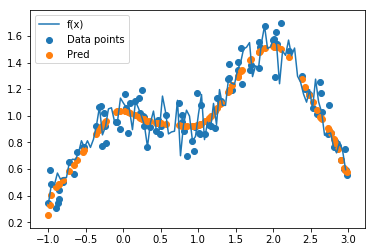

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 500
n_boostraps = 100
degree = 18  # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation.
# Not neccesary, but convenient.
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred
# for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note: Expectations and variances taken w.r.t. different training
# data sets, hence the axis=1. Subsequent means are taken across the test data
# set in order to obtain a total value, but before this we have error/bias/variance
# calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this 
# maintains the column vector form. Dropping this yields very unexpected results.
error = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
bias = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
print('Error:', error)
print('Bias^2:', bias)
print('Var:', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)')
plt.scatter(x_test, y_test, label='Data points')
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Pred')
plt.legend()
plt.show()

## Understanding what happens

Polynomial degree: 0
Error: 0.3214960170351912
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.3214960170351912 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693411
Bias^2: 0.0796891867672603
Var: 0.004579219539673832
0.08426840630693411 >= 0.0796891867672603 + 0.004579219539673832 = 0.08426840630693413
Polynomial degree: 2
Error: 0.10398646080125035
Bias^2: 0.10077114273548984
Var: 0.0032153180657605107
0.10398646080125035 >= 0.10077114273548984 + 0.0032153180657605107 = 0.10398646080125036
Polynomial degree: 3
Error: 0.06547790180152357
Bias^2: 0.062082386342319495
Var: 0.003395515459204099
0.06547790180152357 >= 0.062082386342319495 + 0.003395515459204099 = 0.06547790180152359
Polynomial degree: 4
Error: 0.0684451941400944
Bias^2: 0.06453579006728315
Var: 0.003909404072811226
0.0684451941400944 >= 0.06453579006728315 + 0.003909404072811226 = 0.06844519414009437
Polynomial degree: 5
Error: 0.05227921801205693
Bias^2:

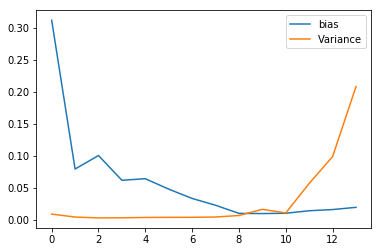

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

#plt.plot(polydegree, np.log10(error), label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

<!-- improve quality of model, better plots to organize -->


<!-- !split  -->
## Summing up

The above equations tell us that in
order to minimize the expected test error, we need to select a
statistical learning method that simultaneously achieves low variance
and low bias. Note that variance is inherently a nonnegative quantity,
and squared bias is also nonnegative. Hence, we see that the expected
test MSE can never lie below $Var(\epsilon)$, the irreducible error.


What do we mean by the variance and bias of a statistical learning
method? The variance refers to the amount by which our model would change if we
estimated it using a different training data set. Since the training
data are used to fit the statistical learning method, different
training data sets  will result in a different estimate. But ideally the
estimate for our model should not vary too much between training
sets. However, if a method has high variance  then small changes in
the training data can result in large changes in the model. In general, more
flexible statistical methods have higher variance.


## The one-dimensional Ising model

The one-dimensional Ising model with nearest neighbor interaction, no external field and a constant coupling constant $J$ is given by

<!-- Equation labels as ordinary links -->
<div id="_auto19"></div>

$$
\begin{equation}
    H = -J \sum_{k}^L s_k s_{k + 1},
\label{_auto19} \tag{30}
\end{equation}
$$

where $s_i \in \{-1, 1\}$ and $s_{N + 1} = s_1$. The number of spins in the system is determined by $L$. For the one-dimensional system there is no phase transition.

We will look at a system of $L = 40$ spins with a coupling constant of $J = 1$. To get enough training data we will generate 10000 states with their respective energies.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.linalg as scl
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
import tqdm
sns.set(color_codes=True)
cmap_args=dict(vmin=-1., vmax=1., cmap='seismic')

L = 40
n = int(1e4)

spins = np.random.choice([-1, 1], size=(n, L))
J = 1.0

energies = np.zeros(n)

for i in range(n):
    energies[i] = - J * np.dot(spins[i], np.roll(spins[i], 1))

Here we use linear (ordinary least squares), ridge and LASSO
regression to predict the energy in the nearest neighbor
one-dimensional Ising model on a ring, i.e., the endpoints wrap
around. We will use the linear regression models to fit a value for
the coupling constant to achieve this.

## Reformulating the problem to suit regression

A more general form for the one-dimensional Ising model is

<!-- Equation labels as ordinary links -->
<div id="_auto20"></div>

$$
\begin{equation}
    H = - \sum_j^L \sum_k^L s_j s_k J_{jk}.
\label{_auto20} \tag{31}
\end{equation}
$$

Here we allow for interactions beyond the nearest neighbors and a more
adaptive coupling matrix. This latter expression can be formulated as
a matrix-product on the form

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation}
    H = X J,
\label{_auto21} \tag{32}
\end{equation}
$$

where $X_{jk} = s_j s_k$ and $J$ is the matrix consisting of the
elements $-J_{jk}$. This form of writing the energy fits perfectly
with the form utilized in linear regression, viz.

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation}
    y = X\omega + \epsilon,
\label{_auto22} \tag{33}
\end{equation}
$$

In [15]:
X = np.zeros((n, L ** 2))
for i in range(n):
    X[i] = np.outer(spins[i], spins[i]).ravel()
y = energies
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.96)

X_train_own = np.concatenate(
    (np.ones(len(X_train))[:, np.newaxis], X_train),
    axis=1
)

X_test_own = np.concatenate(
    (np.ones(len(X_test))[:, np.newaxis], X_test),
    axis=1
)

## Linear regression

The problem at hand is to try to fit the equation

<!-- Equation labels as ordinary links -->
<div id="_auto23"></div>

$$
\begin{equation}
    y = f(x) + \epsilon,
\label{_auto23} \tag{34}
\end{equation}
$$

where $f(x)$ is some unknown function of the data $x$ and $\epsilon$
is normally distributed with mean zero noise with standard deviation
$\sigma_{\epsilon}$. Our job is to try to find a predictor which
estimates the function $f(x)$. In linear regression we assume that we
can formulate the problem as

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation}
    y = X\omega + \epsilon,
\label{_auto24} \tag{35}
\end{equation}
$$

where $X$ and $\omega$ are now matrices. Our job at hand is now to
find a **cost function** $C$, which we wish to minimize in order to find
the best estimate of $\omega$.

## Ordinary least squares

In the ordinary least squares method we choose the cost function

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation}
    C(X, \omega) = ||X\omega - y||^2
    = (X\omega - y)^T(X\omega - y)
\label{_auto25} \tag{36}
\end{equation}
$$

We then find the extremal point of $C$ by taking the derivative with respect to $\omega$ and setting it to zero, i.e.,

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation}
    \dfrac{\mathrm{d}C}{\mathrm{d}\omega}
    = 0.
\label{_auto26} \tag{37}
\end{equation}
$$

This yields the expression for $\omega$ to be

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation}
    \omega = \frac{X^T y}{X^T X},
\label{_auto27} \tag{38}
\end{equation}
$$

which immediately imposes some requirements on $X$ as there must exist
an inverse of $X^T X$. If the expression we are modelling contains an
intercept, i.e., a constant expression we must make sure that the
first column of $X$ consists of $1$.

In [16]:
def get_ols_weights_naive(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    return scl.inv(x.T @ x) @ (x.T @ y)
omega = get_ols_weights_naive(X_train_own, y_train)

## Singular Value decomposition
Doing the inversion directly turns out to be a bad idea as the matrix
$X^TX$ is singular. An alternative approach is to use the **singular
value decomposition**. Using the definition of the Moore-Penrose
pseudoinverse we can write the equation for $\omega$ as

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation}
    \omega = X^{+}y,
\label{_auto28} \tag{39}
\end{equation}
$$

where the pseudoinverse of $X$ is given by

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation}
    X^{+} = \frac{X^T}{X^T X}.
\label{_auto29} \tag{40}
\end{equation}
$$

Using singular value decomposition we have that $X = U\Sigma V^T$,
where $X^{+} = V\Sigma^{+} U^T$. This reduces the equation for
$\omega$ to

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation}
    \omega = V\Sigma^{+} U^T y.
\label{_auto30} \tag{41}
\end{equation}
$$

Note that solving this equation by actually doing the pseudoinverse
(which is what we will do) is not a good idea as this operation scales
as $\mathcal{O}(n^3)$, where $n$ is the number of elements in a
general matrix. Instead, doing $QR$-factorization and solving the
linear system as an equation would reduce this down to
$\mathcal{O}(n^2)$ operations.

In [17]:
def get_ols_weights(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    u, s, v = scl.svd(x)
    return v.T @ scl.pinv(scl.diagsvd(s, u.shape[0], v.shape[0])) @ u.T @ y

Before passing in the data to the function we append a column with ones to the training data.

In [18]:
omega = get_ols_weights(X_train_own,y_train)

## Fitting with scikit-learn

Next we fit a `LinearRegression`-model from Scikit-learn for comparison.

In [19]:
clf = skl.LinearRegression().fit(X_train, y_train)

Extracting the $J$-matrix from both our own method and the Scikit-learn model where we make sure to remove the intercept.

In [20]:
J_own = omega[1:].reshape(L, L)
J_sk = clf.coef_.reshape(L, L)

A way of looking at the coefficients in $J$ is to plot the matrices as images.

In [21]:
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_own, **cmap_args)
plt.title("Home-made OLS", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)

fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_sk, **cmap_args)
plt.title("LinearRegression from Scikit-learn", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)
plt.show()

We can see that our model for the least squares method performes close
to the benchmark from Scikit-learn. It is interesting to note that OLS
considers both $J_{j, j + 1} = -0.5$ and $J_{j, j - 1} = -0.5$ as
valid matrix elements for $J$.

## Ridge regression

Having explored the ordinary least squares we move on to ridge
regression. In ridge regression we include a **regularizer**. This
involves a new cost function which leads to a new estimate for the
weights $\omega$. This results in a penalized regression problem. The
cost function is given by

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation}
    C(X, \omega; \lambda) = ||X\omega - y||^2 + \lambda ||\omega||^2
    = (X\omega - y)^T(X\omega - y) + \lambda \omega^T\omega.
\label{_auto31} \tag{42}
\end{equation}
$$

Finding the extremum of this function yields the weights

<!-- Equation labels as ordinary links -->
<div id="_auto32"></div>

$$
\begin{equation}
    \omega(\lambda) = \frac{X^Ty}{X^TX + \lambda} \to \frac{\omega_{\text{LS}}}{1 + \lambda},
\label{_auto32} \tag{43}
\end{equation}
$$

where $\omega_{\text{LS}}$ is the weights from ordinary least
squares. The last assumption assumes that $X$ is orthogonal, which it
is not. We will therefore resort to solving the equation as it stands
on the left hand side.

In [22]:
def get_ridge_weights(x: np.ndarray, y: np.ndarray, _lambda: float) -> np.ndarray:
    return x.T @ y @ scl.inv(
        x.T @ x + np.eye(x.shape[1], x.shape[1]) * _lambda
    )
_lambda = 0.1
omega_ridge = get_ridge_weights(X_train_own, y_train, np.array([_lambda]))
clf_ridge = skl.Ridge(alpha=_lambda).fit(X_train, y_train)
J_ridge_own = omega_ridge[1:].reshape(L, L)
J_ridge_sk = clf_ridge.coef_.reshape(L, L)
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_ridge_own, **cmap_args)
plt.title("Home-made ridge regression", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)

fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_ridge_sk, **cmap_args)
plt.title("Ridge from Scikit-learn", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)

plt.show()

## LASSO regression

In the **Least Absolute Shrinkage and Selection Operator** (LASSO)-method we get a third cost function.

<!-- Equation labels as ordinary links -->
<div id="_auto33"></div>

$$
\begin{equation}
    C(X, \omega; \lambda) =
    ||X\omega - y||^2 + \lambda ||\omega||
    = (X\omega - y)^T(X\omega - y) + \lambda \sqrt{\omega^T\omega}.
\label{_auto33} \tag{44}
\end{equation}
$$

Finding the extremal point of this cost function is not so straight-forward as in least squares and ridge. We will therefore rely solely on the function ``Lasso`` from Scikit-learn.

In [23]:
clf_lasso = skl.Lasso(alpha=_lambda).fit(X_train, y_train)
J_lasso_sk = clf_lasso.coef_.reshape(L, L)
fig = plt.figure(figsize=(20, 14))
im = plt.imshow(J_lasso_sk, **cmap_args)
plt.title("Lasso from Scikit-learn", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
cb = fig.colorbar(im)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)

plt.show()

It is quite striking how LASSO breaks the symmetry of the coupling
constant as opposed to ridge and OLS. We get a sparse solution with
$J_{j, j + 1} = -1$.


## Performance of the different models

In order to judge which model performs best at varying values of $\lambda$ (for ridge and LASSO) we compute $R^2$ which is given by

<!-- Equation labels as ordinary links -->
<div id="_auto34"></div>

$$
\begin{equation}
    R^2 = 1 - \frac{(y - \boldsymbol{y})^2}{(y - \bar{y})^2},
\label{_auto34} \tag{45}
\end{equation}
$$

where $y$ is a vector with the true values of the energy, $\boldsymbol{y}$ is the predicted values of $y$ from the models and $\bar{y}$ is the mean of $\boldsymbol{y}$.

In [24]:
def r_squared(y, y_hat):
    return 1 - np.sum((y - y_hat) ** 2) / np.sum((y - np.mean(y_hat)) ** 2)

This is the same metric used by Scikit-learn for their regression models when scoring.

In [25]:
y_hat = clf.predict(X_test)
r_test = r_squared(y_test, y_hat)
sk_r_test = clf.score(X_test, y_test)

assert abs(r_test - sk_r_test) < 1e-2

## Performance as  function of the regularization parameter

We see how the different models perform for a different set of values for $\lambda$.

In [26]:
lambdas = np.logspace(-4, 5, 10)

train_errors = {
    "ols_own": np.zeros(lambdas.size),
    "ols_sk": np.zeros(lambdas.size),
    "ridge_own": np.zeros(lambdas.size),
    "ridge_sk": np.zeros(lambdas.size),
    "lasso_sk": np.zeros(lambdas.size)
}

test_errors = {
    "ols_own": np.zeros(lambdas.size),
    "ols_sk": np.zeros(lambdas.size),
    "ridge_own": np.zeros(lambdas.size),
    "ridge_sk": np.zeros(lambdas.size),
    "lasso_sk": np.zeros(lambdas.size)
}

plot_counter = 1

fig = plt.figure(figsize=(32, 54))

for i, _lambda in enumerate(tqdm.tqdm(lambdas)):
    omega = get_ols_weights(X_train_own, y_train)
    y_hat_train = X_train_own @ omega
    y_hat_test = X_test_own @ omega

    train_errors["ols_own"][i] = r_squared(y_train, y_hat_train)
    test_errors["ols_own"][i] = r_squared(y_test, y_hat_test)

    plt.subplot(10, 5, plot_counter)
    plt.imshow(omega[1:].reshape(L, L), **cmap_args)
    plt.title("Home made OLS")
    plot_counter += 1

    omega = get_ridge_weights(X_train_own, y_train, _lambda)
    y_hat_train = X_train_own @ omega
    y_hat_test = X_test_own @ omega

    train_errors["ridge_own"][i] = r_squared(y_train, y_hat_train)
    test_errors["ridge_own"][i] = r_squared(y_test, y_hat_test)

    plt.subplot(10, 5, plot_counter)
    plt.imshow(omega[1:].reshape(L, L), **cmap_args)
    plt.title(r"Home made ridge, $\lambda = %.4f$" % _lambda)
    plot_counter += 1

    for key, method in zip(
        ["ols_sk", "ridge_sk", "lasso_sk"],
        [skl.LinearRegression(), skl.Ridge(alpha=_lambda), skl.Lasso(alpha=_lambda)]
    ):
        method = method.fit(X_train, y_train)

        train_errors[key][i] = method.score(X_train, y_train)
        test_errors[key][i] = method.score(X_test, y_test)

        omega = method.coef_.reshape(L, L)

        plt.subplot(10, 5, plot_counter)
        plt.imshow(omega, **cmap_args)
        plt.title(r"%s, $\lambda = %.4f$" % (key, _lambda))
        plot_counter += 1

plt.show()

We can see that LASSO quite fast reaches a good solution for low
values of $\lambda$, but will "wither" when we increase $\lambda$ too
much. Ridge is more stable over a larger range of values for
$\lambda$, but eventually also fades away.

## Finding the optimal value of $\lambda$

To determine which value of $\lambda$ is best we plot the accuracy of
the models when predicting the training and the testing set. We expect
the accuracy of the training set to be quite good, but if the accuracy
of the testing set is much lower this tells us that we might be
subject to an overfit model. The ideal scenario is an accuracy on the
testing set that is close to the accuracy of the training set.

In [27]:
fig = plt.figure(figsize=(20, 14))

colors = {
    "ols_own": "b",
    "ridge_own": "g",
    "ols_sk": "r",
    "ridge_sk": "y",
    "lasso_sk": "c"
}

for key in train_errors:
    plt.semilogx(
        lambdas,
        train_errors[key],
        colors[key],
        label="Train {0}".format(key),
        linewidth=4.0
    )

for key in test_errors:
    plt.semilogx(
        lambdas,
        test_errors[key],
        colors[key] + "--",
        label="Test {0}".format(key),
        linewidth=4.0
    )
#plt.semilogx(lambdas, train_errors["ols_own"], label="Train (OLS own)")
#plt.semilogx(lambdas, test_errors["ols_own"], label="Test (OLS own)")

plt.legend(loc="best", fontsize=18)
plt.xlabel(r"$\lambda$", fontsize=18)
plt.ylabel(r"$R^2$", fontsize=18)
plt.tick_params(labelsize=18)
plt.show()

From the above figure we can see that LASSO with $\lambda = 10^{-2}$
achieve a very good accuracy on the test set. This by far surpases the
other models for all values of $\lambda$.